In [2]:
import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import pysal
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import shape
from shapely.geometry import Point
import requests
import random
import overpy
import contextily as ctx
from business_models import hahn, greenplum

import h3

from shapely.geometry import shape,Point,Polygon

import geopandas as gpd

import pandas as pd

import numpy as np

from shapely import wkt


# import geo_functions as gf

import os

import geo_functions as gf

from shapely import wkt

from datetime import datetime

In [5]:
api = overpy.Overpass()

query1="""area["name"='England'];
  // query part for: “buildings=* and use=office”
 // node["building"="office"](area);//
    way["building"="house"](area);
  relation["building"="house"](area);"""
print(query1)
result1 = api.query(query1)

area["name"='England'];
  // query part for: “buildings=* and use=office”
 // node["building"="office"](area);//
    way["building"="house"](area);
  relation["building"="house"](area);


OverpassRuntimeError: runtime error: Query timed out in "query" at line 5 after 182 seconds.

In [ ]:
Сколько точек покрывают население 75000

In [2]:
6000/0.08

75000.0

In [ ]:
жадный алгоритм
sorted(by ='population')
for hid in hex_ids 
    

In [ ]:
Загружаем зоны и фильтруем только

In [3]:
eng_data_indexes = greenplum('select * from  snb_geo_lavka.socdem_raw_gb')

In [9]:
eng_data_indexes.describe()

,objectid,st_areasha,st_lengths,Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
count,32844.000000,3.284400e+04,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,...,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000
mean,16422.500000,3.971259e+06,8047.210798,21.669393,16422.499208,5.500122,0.128166,16422.498478,5.500122,0.099921,...,16422.499574,5.500122,-0.000001,16422.499756,5.500122,1666.307514,316.802156,965.482737,384.022622,971.587839
std,9481.390457,1.334170e+07,10508.836832,15.332229,9481.390454,2.872325,0.093539,9481.389874,2.872325,0.067436,...,9481.390525,2.872325,0.821500,9481.390538,2.872325,363.622458,117.761896,306.563460,151.874176,304.150940
min,1.000000,1.690171e+04,681.045115,0.541000,1.000000,1.000000,0.003000,1.000000,1.000000,0.002000,...,1.000000,1.000000,-3.749000,1.000000,1.000000,523.000000,17.000000,310.000000,15.000000,329.000000
25%,8211.750000,2.726763e+05,3117.180737,9.913750,8211.750000,3.000000,0.056000,8211.750000,3.000000,0.050000,...,8211.750000,3.000000,-0.582000,8211.750000,3.000000,1446.000000,238.000000,784.000000,276.000000,793.000000
50%,16422.500000,4.556937e+05,4282.308510,17.647500,16422.500000,5.500000,0.099000,16422.500000,5.500000,0.080000,...,16422.500000,5.500000,-0.068000,16422.500000,5.500000,1598.000000,298.000000,907.000000,367.000000,911.000000
75%,24633.250000,1.285548e+06,7239.181226,29.583000,24633.250000,8.000000,0.178000,24633.250000,8.000000,0.133000,...,24633.250000,8.000000,0.519000,24633.250000,8.000000,1800.000000,372.000000,1074.000000,471.000000,1076.000000
max,32844.000000,6.837843e+08,169371.260616,92.735000,32844.000000,10.000000,0.609000,32844.000000,10.000000,0.534000,...,32844.000000,10.000000,3.310000,32844.000000,10.000000,9551.000000,1632.000000,8608.000000,1372.000000,8589.000000


In [4]:
eng_data_indexes['geometry']=eng_data_indexes['geometry'].apply(lambda x: wkt.loads(x))
gdf_eng_data_indexes= gpd.GeoDataFrame(eng_data_indexes, crs='epsg:4326', geometry='geometry')

In [ ]:
'Employment Rank (where 1 is most deprived)'
 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
    'Crime Rank (where 1 is most deprived)',
    'Living Environment Rank (where 1 is most deprived)',
    'Adult Skills Sub-domain Rank (where 1 is most deprived)',
    'Outdoors Sub-domain Rank (where 1 is most deprived)',
    'Education, Skills and Training Rank (where 1 is most deprived)',
    'Income Rank (where 1 is most deprived)',
     'Health Deprivation and Disability Rank (where 1 is most deprived)',
        'Barriers to Housing and Services Rank (where 1 is most deprived)'

In [15]:
gdf_eng_data_indexes.columns.tolist()

['objectid',
 'lsoa11cd',
 'lsoa11nm',
 'lsoa11nmw',
 'st_areasha',
 'st_lengths',
 'LSOA code (2011)',
 'LSOA name (2011)',
 'Local Authority District code (2019)',
 'Local Authority District name (2019)',
 'Index of Multiple Deprivation (IMD) Score',
 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
 'Income Score (rate)',
 'Income Rank (where 1 is most deprived)',
 'Income Decile (where 1 is most deprived 10% of LSOAs)',
 'Employment Score (rate)',
 'Employment Rank (where 1 is most deprived)',
 'Employment Decile (where 1 is most deprived 10% of LSOAs)',
 'Education, Skills and Training Score',
 'Education, Skills and Training Rank (where 1 is most deprived)',
 'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)',
 'Health Deprivation and Disability Score',
 'Health Deprivation and Disability Rank (where 1 is most deprived)',
 'Health Deprivation a

In [16]:
gdf_eng_data_indexes['pop_density']=gdf_eng_data_indexes['Population aged 16-59: mid 2015 (excluding prisoners)']/ gdf_eng_data_indexes['st_areasha']

In [676]:
gdf_eng_data_indexes.to_file('gdf_eng_data_indexes.geojson', driver='GeoJSON')

In [677]:
gdf_eng_data_indexes[gdf_eng_data_indexes]

(32844, 66)

In [ ]:
gdf_eng_data_indexes.columns

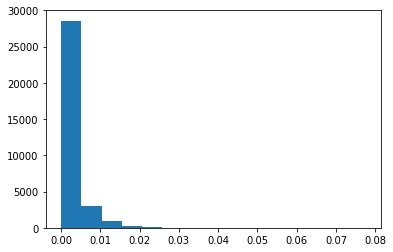

In [19]:
plt.hist(gdf_eng_data_indexes['pop_density'], bins=15);

### данные getir

In [750]:
getir_data = pd.read_csv('getir_data_ld.csv',sep=';',thousands=' ' )

In [785]:
getir_data['Warehouse'].nunique()

37

In [36]:
getir_data['Month'].value_counts()

Jul.21    36
Jun.21    34
May.21    28
Apr.21    20
Mar.21     7
Jan.21     6
Feb.21     5
Name: Month, dtype: int64

In [24]:
import os

In [33]:
gdf_getir=gpd.GeoDataFrame()
for f in os.listdir('getir_zones'):
    gdf1 = gpd.read_file('getir_zones/'+f)
    gdf1 ['zone_name']=f.split('.')[0]
    gdf_getir=pd.concat([gdf_getir,gdf1])

In [784]:
gdf_getir['zone_name'].nunique()

36

In [757]:
getir_data['Warehouse']=getir_data['Warehouse'].apply(lambda x: str.lower(x))

gdf_getir['zone_name'] = gdf_getir['zone_name'].apply(lambda x: ' '.join(x.split('_')))

In [786]:
gdf_getir_data = gdf_getir.merge(getir_data, left_on='zone_name', right_on='Warehouse')

In [789]:
[ i for i in gdf_getir['zone_name'].unique() if i not in gdf_getir_data['zone_name'].unique()]

['st johns wood']

In [792]:
getir_data.loc[getir_data['Warehouse']=="st john's wood",'Warehouse']='st johns wood'

In [793]:
gdf_getir_data = gdf_getir.merge(getir_data, left_on='zone_name', right_on='Warehouse')

In [794]:
[ i for i in gdf_getir['zone_name'].unique() if i not in gdf_getir_data['zone_name'].unique()]

[]

In [795]:
gdf_getir_data=gf.get_gdf(gdf_getir_data, 'geometry', 4326)

In [796]:
gdf_getir_data

,geometry,zone_name,Warehouse,Month,Cty,Ord,MO,MO%,Rch,Rwoq,Q%,TP,U%
0,"POLYGON ((-0.33241 51.56267, -0.33194 51.56327...",wembley,wembley,Jun.21,LON,1925,23,1,"14,2","11,3",44,"1,95",68
1,"POLYGON ((-0.33241 51.56267, -0.33194 51.56327...",wembley,wembley,Jul.21,LON,4952,60,1,"13,3","10,6",42,"2,14",70
2,"POLYGON ((0.14447 51.57084, 0.14447 51.57079, ...",dagenham,dagenham,Jun.21,LON,3301,91,3,"14,5","10,9",48,"2,38",65
3,"POLYGON ((0.14447 51.57084, 0.14447 51.57079, ...",dagenham,dagenham,Jul.21,LON,5269,63,1,"14,4","10,5",51,"2,75",74
4,"POLYGON ((0.14447 51.57084, 0.14447 51.57079, ...",dagenham,dagenham,May.21,LON,312,36,10,"17,5","11,5",65,"2,66",72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,"POLYGON ((-0.12229 51.46349, -0.12202 51.46353...",balham,balham,Apr.21,LON,1315,74,5,"19,9","13,1",65,"2,4",80
130,"POLYGON ((-0.09685 51.54476, -0.09678 51.54475...",clerkenwell,clerkenwell,Jun.21,LON,12233,20,0,"15,5","13,2",45,"2,07",83
131,"POLYGON ((-0.09685 51.54476, -0.09678 51.54475...",clerkenwell,clerkenwell,Jul.21,LON,8415,24,0,"16,1","13,6",40,"1,84",79
132,"POLYGON ((-0.09685 51.54476, -0.09678 51.54475...",clerkenwell,clerkenwell,May.21,LON,11029,226,2,"20,2","12,1",75,"2,73",93


In [797]:
gdf_getir_data['month_num']= gdf_getir_data.groupby('zone_name')['Month'].transform('count')

### Соединяем getir с LSOA , IMD и inclusion score data

In [798]:
gdf_getir_lsoa = gpd.sjoin(gdf_getir_data, gdf_eng_data_indexes, op='intersects', how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [799]:
gdf_getir_lsoa.iloc[0]

geometry                                                                                              POLYGON ((-0.3324098189999631 51.5626732620000...
zone_name                                                                                                                                       wembley
Warehouse                                                                                                                                       wembley
Month                                                                                                                                            Jun.21
Cty                                                                                                                                                 LON
                                                                                                                            ...                        
Older population aged 60 and over: mid 2015 (excluding prisoners)                       

### Соцдем статистика зон Getir для сравнения

In [ ]:
gdf_getir_lsoa.groupby('zone_name').mean()

gdf_getir_lsoa.zone_name.nunique()

gdf_getir.zone_name.unique()

gdf_getir_lsoa.groupby('zone_name')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

gdf_getir_lsoa['pop_density'] = gdf_getir_lsoa['Population aged 16-59: mid 2015 (excluding prisoners)']/gdf_getir_lsoa['lsoa_area']

gdf_getir_data['zone_name'].nunique()



In [824]:
gdf_getir_lsoa_data = gdf_getir_lsoa.groupby(['zone_name','Month','month_num']).mean()[[i for i in gdf_getir_lsoa.columns if 'Decile' in i or 'pop_density'in i or 'Ord' in i ]].sort_values('Ord', ascending=False)

gdf_getir_lsoa_data = gdf_getir_lsoa_data.join(gdf_getir_lsoa.groupby(['zone_name','Month','month_num'])['Population aged 16-59: mid 2015 (excluding prisoners)','lsoa_area'].sum())

# gdf_getir_lsoa_data.zone_name.nunique()

gdf_getir_lsoa_data.rename(columns ={'Population aged 16-59: mid 2015 (excluding prisoners)':'pop_16_59'}, inplace=True)

gdf_getir_lsoa_data.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [825]:
gdf_getir_lsoa_data = gf.get_gdf(gdf_getir_lsoa_data.merge(gdf_getir, on='zone_name'), 'geometry', 4326)

In [827]:
gdf_getir_lsoa_data['pop_density_zone'] = gdf_getir_lsoa_data['pop_16_59']/gdf_getir_lsoa_data['lsoa_area']

In [828]:
gdf_getir_lsoa_data.rename(columns ={'pop_density':'pop_density_mean'}, inplace=True)

In [839]:
gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21'][['Ord','month_num']].corr(method='spearman')

,Ord,month_num
Ord,1.000000,0.619938
month_num,0.619938,1.000000


In [840]:
gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21'][['Ord','pop_density_mean','pop_density_zone','pop_16_59','month_num']].corr(method='spearman')

,Ord,pop_density_mean,pop_density_zone,pop_16_59,month_num
Ord,1.000000,0.527928,0.428571,0.547139,0.619938
pop_density_mean,0.527928,1.000000,0.945431,0.740073,0.446462
pop_density_zone,0.428571,0.945431,1.000000,0.750241,0.333250
pop_16_59,0.547139,0.740073,0.750241,1.000000,0.456203
month_num,0.619938,0.446462,0.333250,0.456203,1.000000


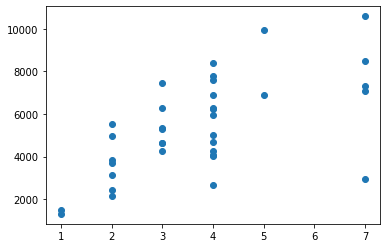

In [838]:
plt.scatter(gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21']['month_num'],gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21']['Ord'] )

In [843]:
gdf_getir_lsoa_data['norm_ord_months'] = gdf_getir_lsoa_data['Ord']/np.log(gdf_getir_lsoa_data['month_num'])

In [845]:
gdf_getir_lsoa_data.columns

Index(['zone_name', 'Month', 'month_num', 'Ord',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)',
       'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)',
       'Crime Decile (where 1 is most deprived 10% of LSOAs)',
       'Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)',
       'Living Environment Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)',
       'Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs)',
       

In [849]:
gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21'][['norm_ord_months','pop_density_mean','pop_density_zone','pop_16_59','Employment Decile (where 1 is most deprived 10% of LSOAs)']].corr(method='spearman')

,norm_ord_months,pop_density_mean,pop_density_zone,pop_16_59,Employment Decile (where 1 is most deprived 10% of LSOAs)
norm_ord_months,1.000000,0.217112,0.220779,0.272901,-0.294118
pop_density_mean,0.217112,1.000000,0.945431,0.740073,-0.303732
pop_density_zone,0.220779,0.945431,1.000000,0.750241,-0.260746
pop_16_59,0.272901,0.740073,0.750241,1.000000,-0.234249
Employment Decile (where 1 is most deprived 10% of LSOAs),-0.294118,-0.303732,-0.260746,-0.234249,1.000000


In [857]:
gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21'].groupby(pd.qcut(gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21']['norm_ord_months'],q=3))['pop_16_59'].quantile([0.1, 0.2,0.5,0.7,0.9])

norm_ord_months          
(1505.207, 4086.367]  0.1     63197.8
                      0.2     75259.4
                      0.5    104041.5
                      0.7    116928.0
                      0.9    151124.0
(4086.367, 5346.398]  0.1     66585.9
                      0.2     77079.4
                      0.5    109609.0
                      0.7    131361.2
                      0.9    162038.6
(5346.398, inf]       0.1     80000.5
                      0.2     89313.8
                      0.5    139934.5
                      0.7    149406.3
                      0.9    181399.4
Name: pop_16_59, dtype: float64

In [860]:
gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21'].groupby(pd.qcut(gdf_getir_lsoa_data[gdf_getir_lsoa_data['Month']=='Jul.21']['norm_ord_months'],q=3))['pop_density_zone'].quantile([0.1, 0.2,0.5,0.7,0.9])

norm_ord_months          
(1505.207, 4086.367]  0.1    2332.846057
                      0.2    2706.881658
                      0.5    5803.067191
                      0.7    6979.764396
                      0.9    7823.941396
(4086.367, 5346.398]  0.1    2004.988346
                      0.2    2814.445334
                      0.5    3988.379197
                      0.7    6467.184571
                      0.9    8025.416082
(5346.398, inf]       0.1    3660.877602
                      0.2    4268.869558
                      0.5    7111.594174
                      0.7    7923.746911
                      0.9    8920.848963
Name: pop_density_zone, dtype: float64

In [863]:
greenplum.write(gdf_getir_lsoa_data,'analyst.iat_getir_zones_imd_stat')

In [866]:
gdf_getir_lsoa_data['penetration']= gdf_getir_lsoa_data['Ord']/gdf_getir_lsoa_data['pop_16_59']

In [867]:
gdf_getir_lsoa_data.to_file('getir_zones_imd_stat.geojson', driver='GeoJSON')

In [1163]:
gdf_getir_lsoa_data[(gdf_getir_lsoa_data['Month']=='Jul.21')&(gdf_getir_lsoa_data['Ord']>6000)][['penetration','pop_16_59','pop_density_zone']].quantile([0.1,0.25,0.5,0.7])

,penetration,pop_16_59,pop_density_zone
0.10,0.041404,113412.00,4458.805726
0.25,0.047128,124909.25,6940.205614
0.50,0.056085,139934.50,7215.822592
0.70,0.059901,156955.00,7894.150856


In [1161]:
(gdf_getir.geometry.to_crs('epsg:2395').area/(10**6)).median()

16.53342258340382

In [770]:
incl_score = pd.read_csv('Inclusive_Growth_Score_Data_uk.csv', sep=';')

In [771]:
incl_score

,Postcode Sector,Postcode Area,Region,Country,Year,Inclusion,Place,Community Wellbeing Index Score,Community Wellbeing Index Benchmark,Community Wellbeing Index Postcode Sector,Commercial Diversity Score,"Commercial Diversity Postcode Sector, %",Economy Inclusion
0,ZE2 9,Lerwick,Scotland,Scotland,2018.0,63.0,71.0,59.0,54.0,49.0,99.0,"31,1",60.0
1,ZE2 9,Lerwick,Scotland,Scotland,2019.0,56.0,60.0,59.0,54.0,49.0,99.0,"31,5",49.0
2,ZE2 9,Lerwick,Scotland,Scotland,2020.0,71.0,60.0,59.0,54.0,49.0,99.0,"36,6",94.0
3,ZE2 9,Lerwick,Scotland,Scotland,2021.0,71.0,59.0,59.0,54.0,49.0,100.0,"39,1",96.0
4,TF3 5,Telford,West Midlands,England,2018.0,50.0,61.0,54.0,61.0,62.0,6.0,"13,9",31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38331,CV6 6,Coventry,West Midlands,England,2021.0,55.0,47.0,37.0,61.0,60.0,90.0,"43,2",77.0
38332,CV35 0,Coventry,West Midlands,England,2018.0,44.0,54.0,26.0,54.0,52.0,80.0,"30,4",59.0
38333,CV35 0,Coventry,West Midlands,England,2019.0,47.0,63.0,26.0,54.0,52.0,81.0,"31,8",60.0
38334,CV35 0,Coventry,West Midlands,England,2020.0,47.0,67.0,26.0,54.0,52.0,66.0,"34,3",50.0


###  Analysis of relationships between IMD Score and number of orders

In [164]:
gdf_getir_lsoa_agg = gdf_getir_lsoa.groupby(['zone_name','Month','month_num'])['Ord','Employment Rank (where 1 is most deprived)',
 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
    'Crime Rank (where 1 is most deprived)',
    'Living Environment Rank (where 1 is most deprived)',
    'Adult Skills Sub-domain Rank (where 1 is most deprived)',
    'Outdoors Sub-domain Rank (where 1 is most deprived)',
    'Education, Skills and Training Rank (where 1 is most deprived)',
    'Income Rank (where 1 is most deprived)',
        'Barriers to Housing and Services Rank (where 1 is most deprived)',
     'Living Environment Decile (where 1 is most deprived 10% of LSOAs)',
    'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [166]:
gdf_getir_lsoa_agg.corr('spearman') ['Ord']

Ord                                                                                   1.000000
Employment Rank (where 1 is most deprived)                                           -0.485714
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                  -0.529670
Crime Rank (where 1 is most deprived)                                                -0.380220
Living Environment Rank (where 1 is most deprived)                                   -0.494505
Adult Skills Sub-domain Rank (where 1 is most deprived)                              -0.380220
Outdoors Sub-domain Rank (where 1 is most deprived)                                  -0.586813
Education, Skills and Training Rank (where 1 is most deprived)                       -0.534066
Income Rank (where 1 is most deprived)                                               -0.490110
Barriers to Housing and Services Rank (where 1 is most deprived)                     -0.582418
Living Environment Decile (where 1 is most deprive

In [95]:
gdf_getir_lsoa_agg

,Ord,Employment Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),Adult Skills Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Income Rank (where 1 is most deprived),Health Deprivation and Disability Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived)
zone_name,,,,,,,,,,,
balham,7586.0,19365.041096,15416.650685,10502.321918,5452.760274,27610.349315,1192.876712,24989.328767,15829.143836,17696.136986,10487.198630
battersea,7087.0,18426.021127,14338.302817,12431.542254,4078.366197,27144.795775,606.338028,24712.802817,15480.218310,19527.478873,9219.774648
bermondsey,6213.0,14133.300000,10416.666667,9409.100000,6897.577778,19590.444444,1380.555556,19584.966667,10591.255556,13829.144444,4416.811111
camden,7301.0,15511.221154,14452.288462,10830.913462,7505.788462,23914.250000,1426.798077,22151.778846,13252.942308,19510.836538,13650.134615
clerkenwell,8415.0,15816.882353,12213.088235,12205.078431,4335.911765,24505.156863,457.745098,21160.656863,12918.274510,16807.215686,8654.137255
colindale,6266.0,19559.689076,16572.697479,14885.252101,12622.218487,18097.865546,4806.957983,21013.478992,14840.092437,26762.302521,4198.705882
croydon,4613.0,13936.317460,11745.396825,9843.444444,8963.238095,17786.325397,4279.587302,17454.880952,11519.952381,16642.722222,5117.476190
dagenham,5269.0,10602.610390,7860.233766,9747.311688,10341.948052,7023.766234,5036.649351,10310.935065,8193.350649,13178.532468,2283.701299
deptford,5008.0,16140.625000,12317.312500,9384.609375,6690.546875,24727.765625,2037.609375,22358.281250,12371.875000,16617.031250,5576.796875


In [167]:
gdf_getir_lsoa_agg = gdf_getir_lsoa_agg.merge( gdf_getir_lsoa.groupby('zone_name')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum().reset_index(), on='zone_name')

In [168]:
gdf_getir_lsoa_agg['penetration'] = gdf_getir_lsoa_agg['Ord']/gdf_getir_lsoa_agg['Population aged 16-59: mid 2015 (excluding prisoners)']

In [169]:
gdf_getir_lsoa_agg.corr(method='spearman')['penetration']

Ord                                                                                   0.353846
Employment Rank (where 1 is most deprived)                                           -0.147253
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                  -0.195604
Crime Rank (where 1 is most deprived)                                                -0.195604
Living Environment Rank (where 1 is most deprived)                                    0.094505
Adult Skills Sub-domain Rank (where 1 is most deprived)                              -0.380220
Outdoors Sub-domain Rank (where 1 is most deprived)                                   0.010989
Education, Skills and Training Rank (where 1 is most deprived)                       -0.265934
Income Rank (where 1 is most deprived)                                               -0.200000
Barriers to Housing and Services Rank (where 1 is most deprived)                     -0.345055
Living Environment Decile (where 1 is most deprive

In [122]:
gdf_getir_lsoa_agg.columns

Index(['zone_name', 'Ord', 'Employment Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Crime Rank (where 1 is most deprived)',
       'Living Environment Rank (where 1 is most deprived)',
       'Adult Skills Sub-domain Rank (where 1 is most deprived)',
       'Outdoors Sub-domain Rank (where 1 is most deprived)',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Income Rank (where 1 is most deprived)',
       'Health Deprivation and Disability Rank (where 1 is most deprived)',
       'Barriers to Housing and Services Rank (where 1 is most deprived)',
       'Population aged 16-59: mid 2015 (excluding prisoners)', 'penetration'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='penetration'>

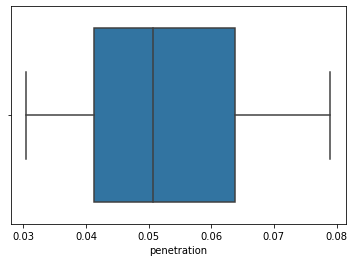

In [150]:
sns.boxplot(gdf_getir_lsoa_agg['penetration'])

In [152]:
gdf_getir_lsoa_agg['Population aged 16-59: mid 2015 (excluding prisoners)']

0     184208
1     123041
2     141901
3     134927
4     140318
5      80789
6      86263
7     102439
8      88555
9      65523
10    153414
11     79595
12     78621
13     74419
Name: Population aged 16-59: mid 2015 (excluding prisoners), dtype: int64

(array([3., 7., 8., 3., 7., 3., 2., 1., 1., 1.]),
 array([ 9.88219241, 11.9482122 , 14.014232  , 16.08025179, 18.14627158,
        20.21229137, 22.27831117, 24.34433096, 26.41035075, 28.47637054,
        30.54239033]),
 <BarContainer object of 10 artists>)

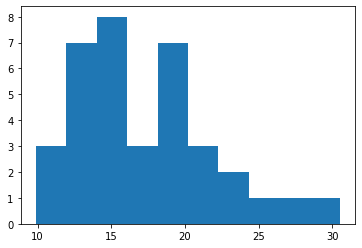

In [1192]:
plt.hist(gdf_getir.to_crs('epsg:2395').geometry.area/(10**6))

In [1193]:
np.mean(gdf_getir.to_crs('epsg:2395').geometry.area/(10**6))

17.316471587217716

In [1194]:
gdf_getir

,geometry,zone_name
0,"POLYGON ((-0.33241 51.56267, -0.33194 51.56327...",wembley
0,"POLYGON ((0.14447 51.57084, 0.14447 51.57079, ...",dagenham
0,"POLYGON ((-0.08521 51.44554, -0.08865 51.44557...",peckham
0,"POLYGON ((-0.03312 51.50736, -0.04107 51.50877...",canary wharf
0,"POLYGON ((-0.40637 51.50525, -0.40852 51.50013...",hayes
0,"POLYGON ((-0.23586 51.49131, -0.23078 51.49111...",earls court
0,"POLYGON ((-0.30443 51.39304, -0.30439 51.39300...",tolworth
0,"POLYGON ((-0.03813 51.46418, -0.03774 51.46540...",deptford
0,"POLYGON ((-0.14679 51.49784, -0.14461 51.49665...",battersea
0,"POLYGON ((-0.02491 51.46072, -0.02176 51.45870...",forest hill


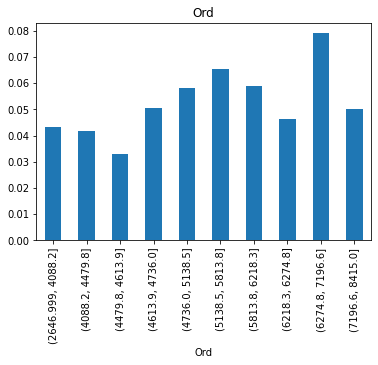

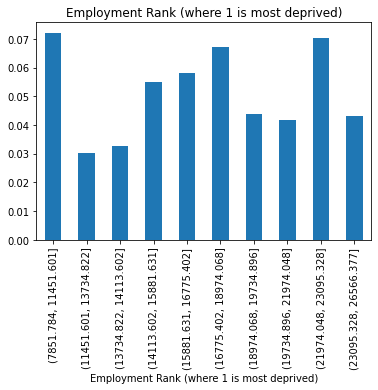

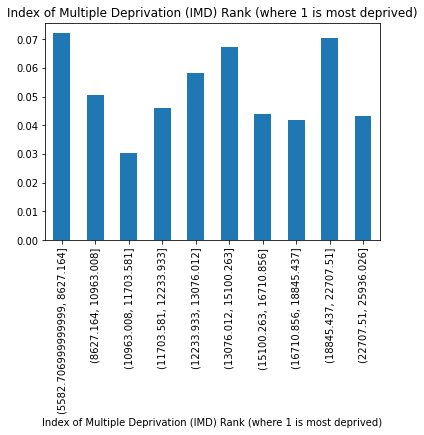

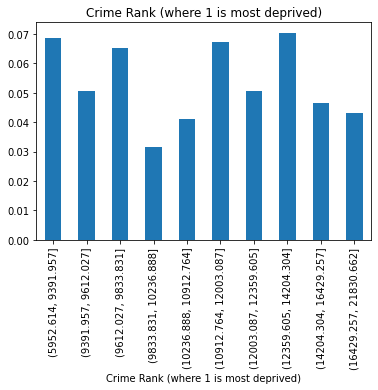

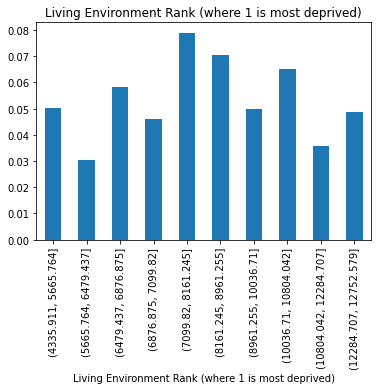

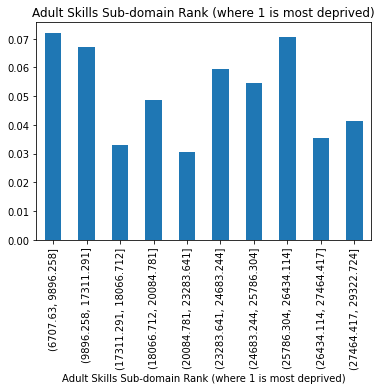

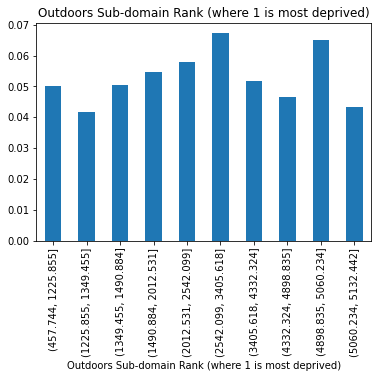

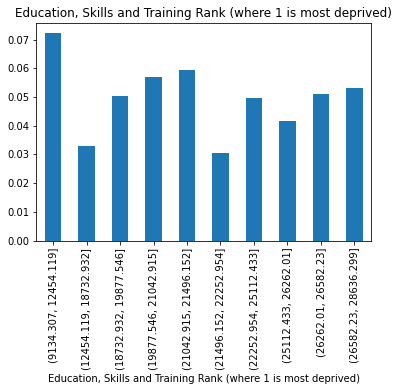

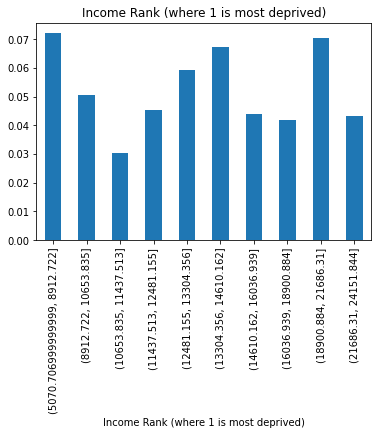

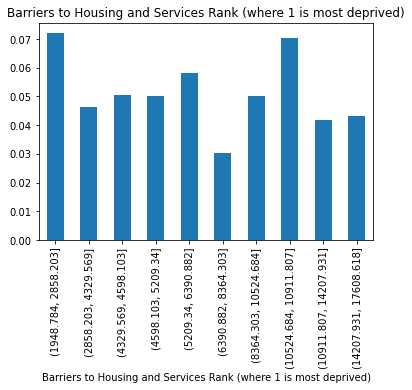

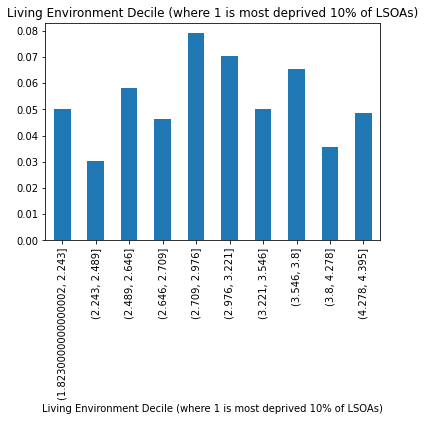

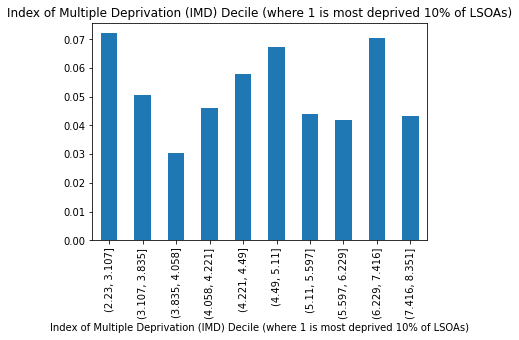

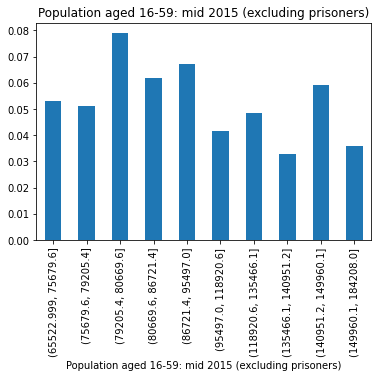

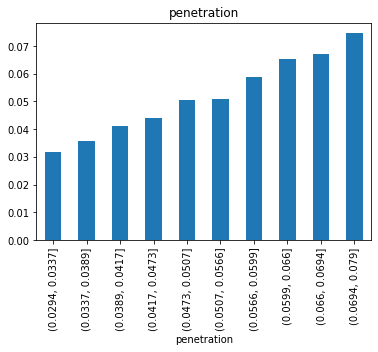

In [170]:
for i in gdf_getir_lsoa_agg.columns[1:]:
    plt.title(i)
    gdf_getir_lsoa_agg.groupby(pd.qcut(gdf_getir_lsoa_agg[i],q=10))['penetration'].mean().plot(kind='bar')
    plt.show()

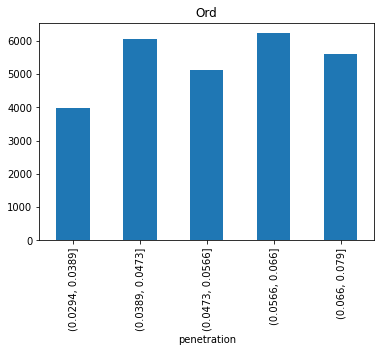

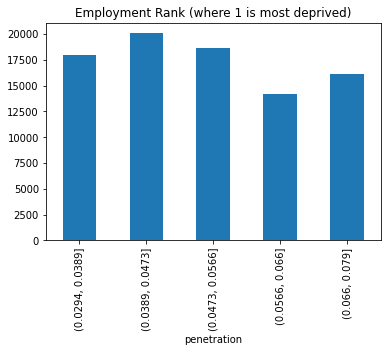

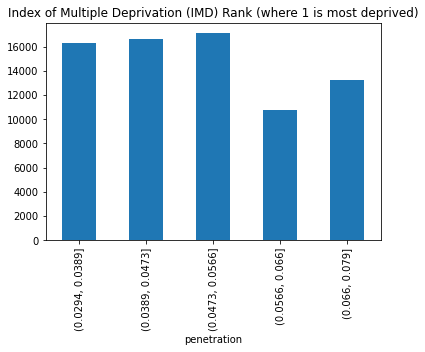

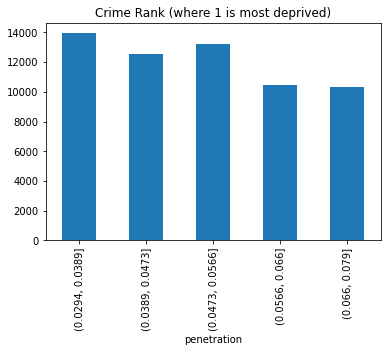

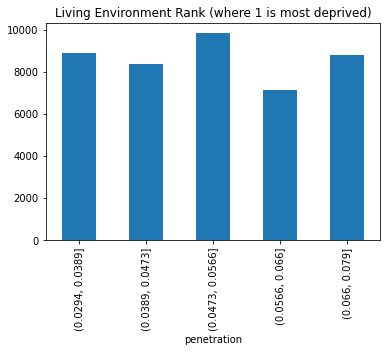

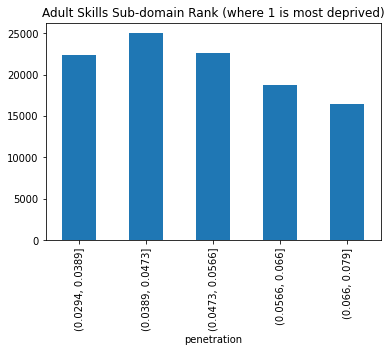

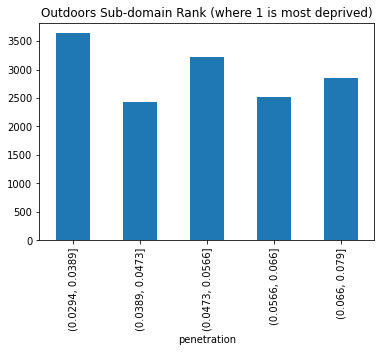

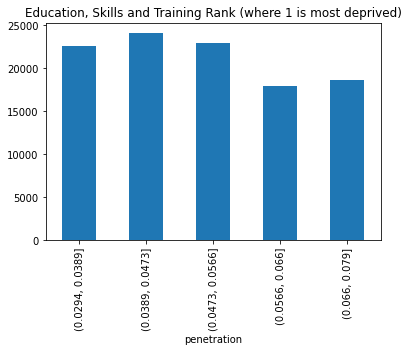

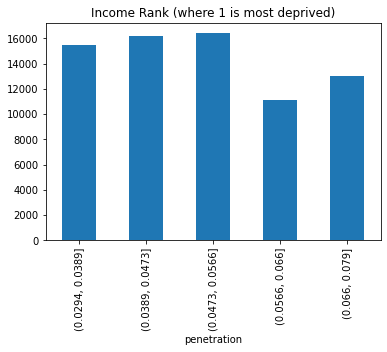

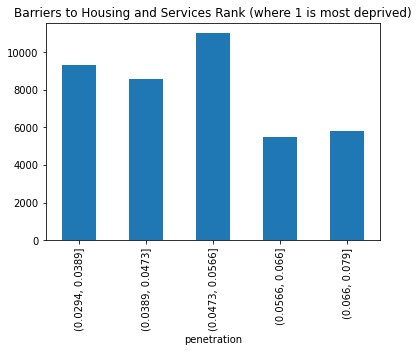

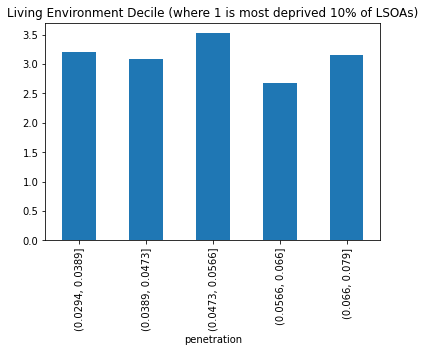

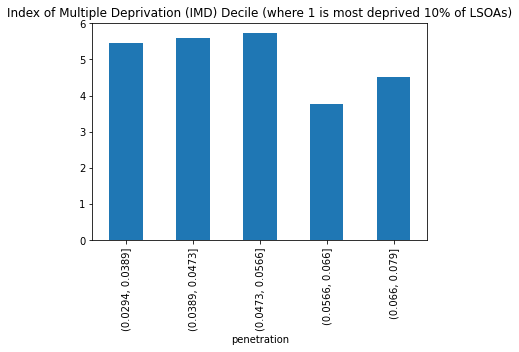

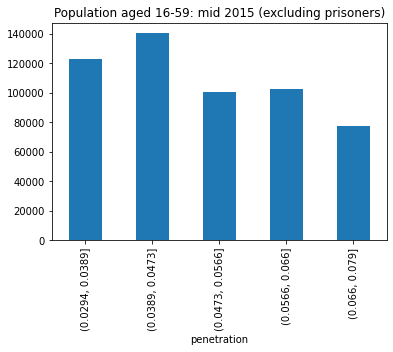

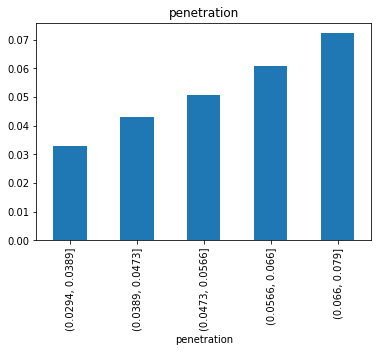

In [171]:
for i in gdf_getir_lsoa_agg.columns[1:]:
    plt.title(i)
    gdf_getir_lsoa_agg.groupby(pd.qcut(gdf_getir_lsoa_agg['penetration'],q=5))[i].mean().plot(kind='bar')
    plt.show()

In [172]:
gdf_getir_lsoa_agg.columns

Index(['zone_name', 'Ord', 'Employment Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Crime Rank (where 1 is most deprived)',
       'Living Environment Rank (where 1 is most deprived)',
       'Adult Skills Sub-domain Rank (where 1 is most deprived)',
       'Outdoors Sub-domain Rank (where 1 is most deprived)',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Income Rank (where 1 is most deprived)',
       'Barriers to Housing and Services Rank (where 1 is most deprived)',
       'Living Environment Decile (where 1 is most deprived 10% of LSOAs)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Population aged 16-59: mid 2015 (excluding prisoners)', 'penetration'],
      dtype='object')

In [173]:
gdf_getir_lsoa.groupby(['zone_name', 'Living Environment Decile (where 1 is most deprived 10% of LSOAs)']).size()

zone_name  Living Environment Decile (where 1 is most deprived 10% of LSOAs)
balham     1                                                                    44
           2                                                                    49
           3                                                                    38
           4                                                                    12
           5                                                                     3
                                                                                ..
wimbledon  3                                                                    20
           4                                                                    17
           5                                                                    20
           6                                                                     8
           7                                                                     2
Length: 80

In [177]:
gdf_getir_lsoa_agg = gdf_getir_lsoa_agg.merge(pd.pivot_table(gdf_getir_lsoa, index='zone_name', columns = 'Living Environment Decile (where 1 is most deprived 10% of LSOAs)' ,values='Income Rank (where 1 is most deprived)', aggfunc='count').reset_index(), on='zone_name')

In [179]:
gdf_getir_lsoa_agg.corr()['penetration']

Ord                                                                                   0.326094
Employment Rank (where 1 is most deprived)                                           -0.332727
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                  -0.347239
Crime Rank (where 1 is most deprived)                                                -0.352463
Living Environment Rank (where 1 is most deprived)                                   -0.002045
Adult Skills Sub-domain Rank (where 1 is most deprived)                              -0.504517
Outdoors Sub-domain Rank (where 1 is most deprived)                                  -0.043835
Education, Skills and Training Rank (where 1 is most deprived)                       -0.478624
Income Rank (where 1 is most deprived)                                               -0.323441
Barriers to Housing and Services Rank (where 1 is most deprived)                     -0.366420
Living Environment Decile (where 1 is most deprive

In [187]:
for i in  gdf_getir_lsoa_agg.columns[-7:]:
    gdf_getir_lsoa_agg[i] = gdf_getir_lsoa_agg[i]/ gdf_getir_lsoa_agg[gdf_getir_lsoa_agg.columns[-7:]].sum(axis=1)

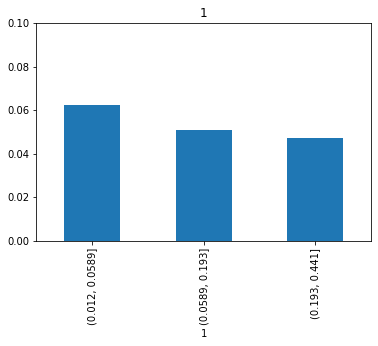

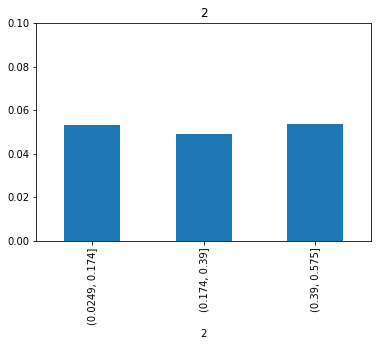

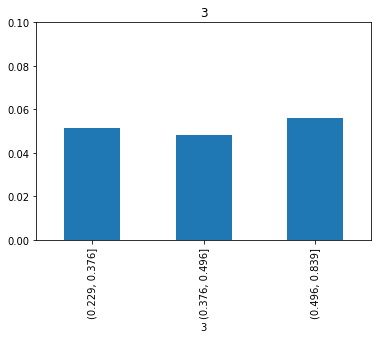

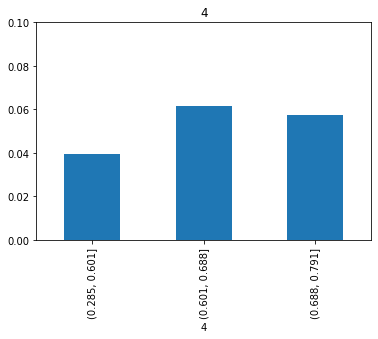

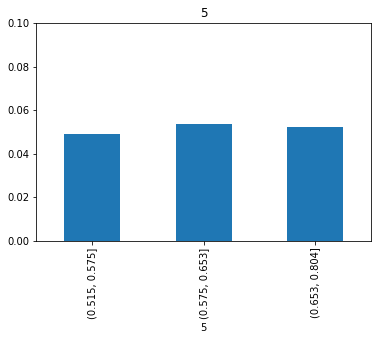

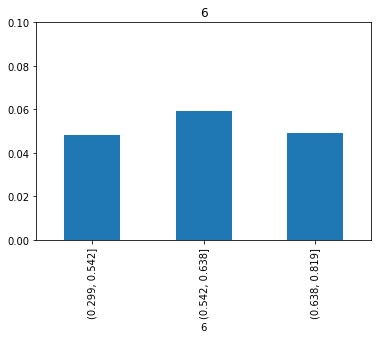

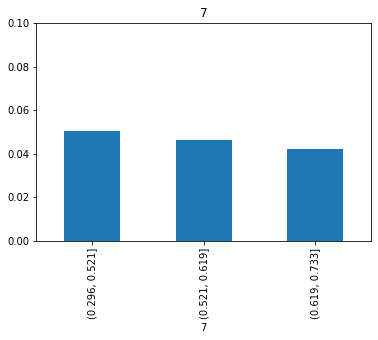

In [193]:
for i in gdf_getir_lsoa_agg.columns[-7:]:
    plt.title(i)
    gdf_getir_lsoa_agg.groupby(pd.qcut(gdf_getir_lsoa_agg[i],q=3))['penetration'].mean().plot(kind='bar')
    plt.ylim(0,0.1)
    plt.show()

In [ ]:
"Пока целевые 3-6 "

In [103]:
greenplum('select * from snb_geo_lavka.hex_socdem_gb').to_csv('hex_socdem_gb_0712.csv')

In [195]:
eng_data_indexes_lavka = eng_data_indexes[(eng_data_indexes['Living Environment Decile (where 1 is most deprived 10% of LSOAs)']>=3) & (eng_data_indexes['Living Environment Decile (where 1 is most deprived 10% of LSOAs)']<=9)]

In [68]:
eng_data_indexes_lavka

NameError: name 'eng_data_indexes_lavka' is not defined

In [205]:
gdf_getir_lsoa.groupby(['zone_name'])['Ord'].agg(['size','mean'])

,size,mean
zone_name,,
balham,146,7586.0
bermondsey,90,6213.0
clerkenwell,102,8415.0
colindale,119,6266.0
croydon,126,4613.0
dagenham,77,5269.0
deptford,64,5008.0
fulham,87,4280.0
hounslow,73,5950.0


In [260]:
gdf_getir_lsoa['zone_name'].value_counts().quantile([0,0.1,0.25,0.5, 0.75,1])

0.00     56.00
0.10     64.30
0.25     73.75
0.50     82.00
0.75    114.75
1.00    146.00
Name: zone_name, dtype: float64

In [1197]:
gdf_getir_lsoa[gdf_getir_lsoa['Ord']>6000]['Warehouse'].unique()

array(['peckham', 'canary wharf', 'battersea', 'notting hill', 'camden',
       'hounslow', 'colindale', 'seven sisters', 'tottenham',
       'bermondsey', 'hackney', 'bethnal green', 'forest gate', 'leyton',
       'balham', 'clerkenwell'], dtype=object)

In [259]:
gdf_getir_lsoa['Population aged 16-59: mid 2015 (excluding prisoners)'].quantile([0,0.1,0.25,0.5, 0.75,1])

0.00     575.0
0.10     878.2
0.25    1009.0
0.50    1145.0
0.75    1341.0
1.00    2973.0
Name: Population aged 16-59: mid 2015 (excluding prisoners), dtype: float64

In [287]:
gdf_getir_lsoa['st_areasha']/100000

1     19.434864
1     22.973608
1     13.091292
1      3.751622
1      1.509419
        ...    
26     1.442520
26     1.489760
26     6.017161
26     3.356679
26     1.223590
Name: st_areasha, Length: 1277, dtype: float64

In [286]:
gdf_eng_data_indexes['lsoa_area'] = gdf_eng_data_indexes.to_crs('epsg:32630')['geometry'].area/1000000

In [276]:
gdf_getir_lsoa['area']= gdf_getir_lsoa.geometry.to_crs('epsg:32630').area/1000000

In [1207]:
(gdf_getir_lsoa[(gdf_getir_lsoa['Ord']>6000)&(gdf_getir_lsoa['Month']=='Jul.21')].to_crs('epsg:2395').geometry.area/(10**6)).quantile([0.1,0.25,0.5,0.7])

0.10    13.311662
0.25    14.322550
0.50    17.057803
0.70    20.652505
dtype: float64

In [291]:
gdf_getir_lsoa = gdf_getir_lsoa.merge(gdf_eng_data_indexes[['lsoa_area','LSOA code (2011)']], on='LSOA code (2011)')

In [292]:
gdf_getir_lsoa['pop_density']=gdf_getir_lsoa['Population aged 16-59: mid 2015 (excluding prisoners)']/gdf_getir_lsoa['lsoa_area']

In [295]:
gdf_getir_lsoa['pop_density_zone']=gdf_getir_lsoa.groupby('zone_name')['Population aged 16-59: mid 2015 (excluding prisoners)'].transform('sum')/gdf_getir_lsoa['area']

In [297]:
gdf_getir_lsoa.groupby('zone_name')['pop_density_zone'].mean().quantile([0,0.1,0.25,0.5, 0.75,1])

0.00     4210.737227
0.10     4673.027492
0.25     5416.559021
0.50     6856.003366
0.75     9563.549576
1.00    11322.873585
Name: pop_density_zone, dtype: float64

(array([294., 459., 297., 147.,  59.,  10.,   3.,   3.,   2.,   3.]),
 array([   92.69001452,  3683.32465059,  7273.95928666, 10864.59392274,
        14455.22855881, 18045.86319488, 21636.49783095, 25227.13246702,
        28817.7671031 , 32408.40173917, 35999.03637524]),
 <BarContainer object of 10 artists>)

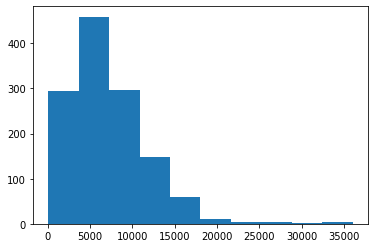

In [293]:
plt.hist(gdf_getir_lsoa['pop_density'])

In [294]:
gdf_getir_lsoa['pop_density'].quantile([0,0.1,0.25,0.5, 0.75,1])

0.00       92.690015
0.10     2384.967210
0.25     3818.593900
0.50     6320.242900
0.75     9692.151968
1.00    35999.036375
Name: pop_density, dtype: float64

In [258]:
gdf_getir_lsoa_agg['Population aged 16-59: mid 2015 (excluding prisoners)'].quantile([0,0.1,0.25,0.5, 0.75,1])

0.00     65523.00
0.10     75679.60
0.25     79893.50
0.50     95497.00
0.75    138970.25
1.00    184208.00
Name: Population aged 16-59: mid 2015 (excluding prisoners), dtype: float64

In [227]:
gdf_getir_lsoa_agg.groupby(pd.qcut(gdf_getir_lsoa_agg['Population aged 16-59: mid 2015 (excluding prisoners)'],q=10))['Ord'].mean()

Population aged 16-59: mid 2015 (excluding prisoners)
(65522.999, 75679.6]    3630.5
(75679.6, 79205.4]      4006.0
(79205.4, 80669.6]      6288.0
(80669.6, 86721.4]      5138.5
(86721.4, 95497.0]      5950.0
(95497.0, 118920.6]     4280.0
(118920.6, 135466.1]    6239.5
(135466.1, 140951.2]    4613.0
(140951.2, 149960.1]    8415.0
(149960.1, 184208.0]    6127.0
Name: Ord, dtype: float64

In [209]:
75000/82

914.6341463414634

In [208]:
eng_data_indexes_lavka.shape[0]/82

280.3780487804878

In [215]:
len(eng_data_indexes_lavka[eng_data_indexes_lavka['Population aged 16-59: mid 2015 (excluding prisoners)']>1000])//82

85

In [460]:
eng_data_indexes_lavka_pop = eng_data_indexes_lavka

In [18]:
lsoa_london = pd.read_csv('lsoa_london_list.csv', sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (174,175,176,178,196,253) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [249]:
eng_data_indexes_lavka_pop['area_name'] = eng_data_indexes_lavka_pop[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
eng_data_indexes['area_name'] = eng_data_indexes[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

In [20]:
eng_data_indexes[eng_data_indexes.area_name=='London']['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

5553675

In [8]:
gdf_eng_data_indexes_lnd = gf.get_gdf(eng_data_indexes[eng_data_indexes.area_name=='London'][['Population aged 16-59: mid 2015 (excluding prisoners)','geometry','lsoa11cd']], 'geometry',4326)
# gdf_eng_data_indexes_lnd .to_file('all_london_pop_lsoa.geojson', driver='GeoJSON')

AttributeError: 'DataFrame' object has no attribute 'area_name'

In [255]:
eng_data_indexes_lavka_pop.groupby(['area_name'])['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

area_name
Adur            15340
Allerdale       22288
Amber Valley    42640
Arun            32946
Ashfield        46288
                ...  
Wychavon        25338
Wycombe         50645
Wyre            26365
Wyre Forest     15737
York            84487
Name: Population aged 16-59: mid 2015 (excluding prisoners), Length: 284, dtype: int64

In [647]:
eng_data_indexes_lavka_pop = eng_data_indexes_lavka_pop.merge(gdf_eng_data_indexes[['lsoa_area','LSOA code (2011)']], on='LSOA code (2011)')

In [648]:
eng_data_indexes_lavka_pop['pop_density'] = eng_data_indexes_lavka_pop['Population aged 16-59: mid 2015 (excluding prisoners)']/eng_data_indexes_lavka_pop['lsoa_area']

In [649]:
eng_data_indexes_lavka_pop['pop_density']

0         2005.995748
1         3855.329690
2         3386.491432
3         2250.451383
4        11396.838573
             ...     
22986      358.790607
22987     1569.942418
22988     3119.383655
22989     3592.809135
22990     2794.908846
Name: pop_density, Length: 22991, dtype: float64

In [302]:
eng_data_indexes_lavka_pop.to_csv('eng_data_indexes_lavka_pop.csv')

In [674]:
eng_data_indexes_lavka_pop.to_file('eng_data_indexes_lavka_pop_0912.geojson', driver='GeoJSON')

In [306]:
from sklearn.cluster import DBSCAN

In [316]:
eng_indexes_lavka_ok = eng_data_indexes_lavka_pop[(eng_data_indexes_lavka_pop.pop_density>2000)]

In [317]:
eng_indexes_lavka_ok=gf.get_gdf(eng_indexes_lavka_ok, 'geometry', 4326)

In [318]:
eng_indexes_lavka_ok['center_x']= eng_indexes_lavka_ok.to_crs('epsg:32630')['geometry'].apply(lambda x: x.centroid.x)
eng_indexes_lavka_ok['center_y']= eng_indexes_lavka_ok.to_crs('epsg:32630')['geometry'].apply(lambda x: x.centroid.y)

In [438]:
X = eng_indexes_lavka_ok[['center_x','center_y']]
clustering = DBSCAN(eps=1700, min_samples=15).fit(X)
clustering.labels_

array([ 0,  0,  0, ..., -1,  3,  3])

In [439]:
eng_indexes_lavka_ok['cluster_num'] = clustering.labels_

In [440]:
eng_indexes_lavka_ok['cluster_num'].nunique()

53

(array([51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  14079. ,  325949.9,  637820.8,  949691.7, 1261562.6, 1573433.5,
        1885304.4, 2197175.3, 2509046.2, 2820917.1, 3132788. ]),
 <BarContainer object of 10 artists>)

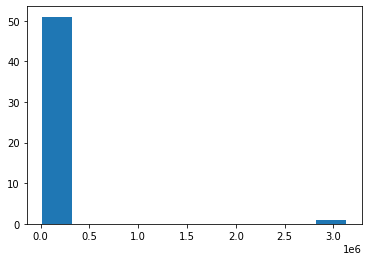

In [441]:
plt.hist(eng_indexes_lavka_ok[eng_indexes_lavka_ok.cluster_num>=0].groupby(['cluster_num'])['Population aged 16-59: mid 2015 (excluding prisoners)'].sum())

In [444]:
eng_indexes_lavka_ok['cluster_pop'] = eng_indexes_lavka_ok.groupby(['cluster_num'])['Population aged 16-59: mid 2015 (excluding prisoners)'].transform('sum')#.min()

<AxesSubplot:>

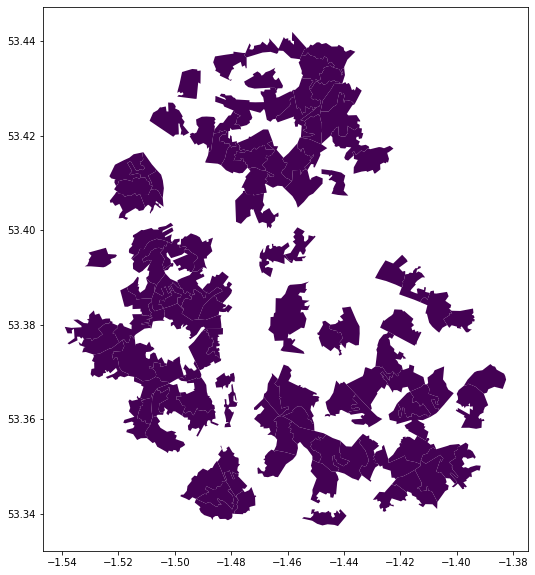

In [435]:
eng_indexes_lavka_ok[eng_indexes_lavka_ok['cluster_num']==12].plot(column='cluster_num', figsize=(10,10))

In [467]:
geometry_zones = eng_indexes_lavka_ok[(eng_indexes_lavka_ok.cluster_num>0)].groupby('cluster_num')['geometry'].apply(lambda x:x.unary_union.convex_hull).reset_index()

In [470]:
geometry_zones.crs='epsg:4326'

In [463]:
eng_data_indexes_lavka= gf.get_gdf(eng_data_indexes_lavka,'geometry', 4326)

In [473]:

2
gpd.sjoin(geometry_zones, eng_data_indexes_lavka, op='intersects', how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,cluster_num,geometry,index_right,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,LSOA code (2011),...,Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),pop_density
0,1,"POLYGON ((-2.15832 53.38308, -2.17593 53.38673...",14067,5767,E01005927,Stockport 032A,Stockport 032A,4.035464e+05,3856.490898,E01005927,...,6,-0.352,21226,7,1325,252,743,330,755,0.001841
0,1,"POLYGON ((-2.15832 53.38308, -2.17593 53.38673...",532,5768,E01005928,Stockport 032B,Stockport 032B,9.387897e+05,5057.581989,E01005928,...,4,-0.167,18100,6,1627,351,927,349,917,0.000987
0,1,"POLYGON ((-2.15832 53.38308, -2.17593 53.38673...",28084,5680,E01005840,Stockport 031D,Stockport 031D,5.185664e+05,6530.619414,E01005840,...,2,-0.094,16878,6,1515,275,848,392,864,0.001635
0,1,"POLYGON ((-2.15832 53.38308, -2.17593 53.38673...",15314,5643,E01005803,Stockport 027D,Stockport 027D,4.136703e+05,3724.830942,E01005803,...,5,-0.595,24840,8,1480,270,807,403,821,0.001951
0,1,"POLYGON ((-2.15832 53.38308, -2.17593 53.38673...",29559,5641,E01005801,Stockport 027B,Stockport 027B,7.795758e+05,4783.315116,E01005801,...,2,-0.598,24899,8,1584,316,933,335,962,0.001197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,"POLYGON ((-1.44117 50.91440, -1.44257 50.91446...",2988,16684,E01017184,Southampton 004B,Southampton 004B,3.452702e+05,2792.818197,E01017184,...,5,1.124,3359,2,1413,266,728,419,747,0.002108
50,51,"POLYGON ((-1.44117 50.91440, -1.44257 50.91446...",2746,16647,E01017146,Southampton 001C,Southampton 001C,1.130657e+06,6995.771799,E01017146,...,8,0.918,4710,2,2082,235,1421,426,1498,0.001257
50,51,"POLYGON ((-1.44117 50.91440, -1.44257 50.91446...",135,16680,E01017180,Southampton 002A,Southampton 002A,3.836616e+05,3278.475428,E01017180,...,4,0.505,8364,3,1461,281,807,373,801,0.002103
50,51,"POLYGON ((-1.44117 50.91440, -1.44257 50.91446...",1029,16683,E01017183,Southampton 002C,Southampton 002C,3.171706e+05,2535.705181,E01017183,...,8,0.496,8462,3,1691,356,939,396,930,0.002961


In [475]:
geometry_zones = gpd.sjoin(geometry_zones, eng_data_indexes_lavka, op='intersects', how='left')[['Population aged 16-59: mid 2015 (excluding prisoners)','cluster_num','geometry']].dissolve(by='cluster_num', aggfunc='sum').reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [476]:
geometry_zones.to_file('zones_geometry.geojson', driver='GeoJSON')

#### Изохроны

In [ ]:
gdf_iso = greenplum("""select t1.*,
       t2.*,
       st_area(st_intersection(st_makevalid(t1.geometry),st_makevalid(t2.geometry)))/st_area(t1.geometry)as inter_share
from snb_geo_lavka.socdem_raw_gb t1
join snb_geo_lavka.international_iso_osmnx t2
on st_intersects(t1.geometry,t2.geometry)
where cluster='london'""")

In [64]:
df_iso_eng = greenplum("select * from snb_geo_lavka.international_iso_osmnx where cluster='london'")

In [65]:
df_iso_eng['geometry']=df_iso_eng['geometry'].apply(lambda x: wkt.loads(x))

In [66]:
gdf_iso_eng=gf.get_gdf(df_iso_eng, 'geometry',4326)

In [67]:
gdf_iso_eng.head()

,hex_gid,geometry,speed_km,cluster
0,88194ad0a9fffff,"MULTIPOLYGON (((-0.00849 51.38955, -0.00650 51...",30,london
1,88194e6d67fffff,"MULTIPOLYGON (((0.00008 51.47190, 0.00327 51.4...",30,london
2,88195da543fffff,"MULTIPOLYGON (((-0.20273 51.61141, -0.19587 51...",30,london
3,88194e6b07fffff,"MULTIPOLYGON (((-0.03383 51.61210, -0.03688 51...",30,london
4,88194ad285fffff,"MULTIPOLYGON (((0.06328 51.40781, 0.06243 51.4...",30,london


In [522]:
gdf_iso_eng.to_file('gdf_iso_eng.geojson', driver='GeoJSON')

In [523]:
gdf_iso_stat = gpd.sjoin(gdf_iso_eng,eng_data_indexes_lavka, op='intersects'  )

eng_data_indexes_lavka_pop=gf.get_gdf(eng_data_indexes_lavka_pop,'geometry', 4326)

gdf_iso_stat['captured_audience'] = gdf_iso_stat.groupby('hex_gid')['Population aged 16-59: mid 2015 (excluding prisoners)'].transform('sum')

gdf_iso_stat_ok = gdf_iso_stat[gdf_iso_stat['captured_audience']>40000]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


KeyboardInterrupt: 

In [499]:
eng_data_indexes_lavka_pop.to_file('eng_data_indexes_lavka_pop.geojson', driver='GeoJSON')

In [642]:
eng_data_indexes_lavka_pop['area_name'] = eng_data_indexes_lavka_pop[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

In [650]:
eng_data_indexes_lavka_pop[eng_data_indexes_lavka_pop['area_name']=='London'].to_file('eng_data_indexes_lavka_london.geojson', driver='GeoJSON')

In [654]:
eng_data_indexes_lavka_pop[eng_data_indexes_lavka_pop['area_name']=='Birmingham'].to_file('eng_data_indexes_lavka_birmingham.geojson', driver='GeoJSON')

In [655]:
eng_data_indexes_lavka_pop[eng_data_indexes_lavka_pop['area_name']=='Manchester'].to_file('eng_data_indexes_lavka_manchester.geojson', driver='GeoJSON')

In [652]:
sorted(eng_data_indexes_lavka_pop['area_name'].unique())

['Adur',
 'Allerdale',
 'Amber Valley',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Birmingham',
 'Blaby',
 'Blackburn with Darwen',
 'Blackpool',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bournemouth, Christchurch and Poole',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brentwood',
 'Brighton and Hove',
 'Bristol, City of',
 'Broadland',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Calderdale',
 'Cambridge',
 'Cannock Chase',
 'Canterbury',
 'Carlisle',
 'Castle Point',
 'Central Bedfordshire',
 'Charnwood',
 'Chelmsford',
 'Cheltenham',
 'Cherwell',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'Colchester',
 'Copeland',
 'Corby',
 'Cornwall',
 'Cotswold',
 'County Durham',
 'Coventry',
 'Craven',
 'Crawley',
 'Dacorum',
 'Darlington',
 

In [579]:
gdf_iso_stat[gdf_iso_stat['area_name']=='Luton']['captured_audience']

Series([], Name: captured_audience, dtype: int64)

In [ ]:
import gc
gc.collect()

In [503]:
gdf_iso_stat_ok['r'] = gdf_iso_stat_ok.groupby('hex_gid')['captured_audience'].rank('first')
gdf_iso_stat_ok=gdf_iso_stat_ok[gdf_iso_stat_ok['r']==1]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [507]:
gdf_iso_stat_ok['area_name'] = gdf_iso_stat_ok[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

<AxesSubplot:>

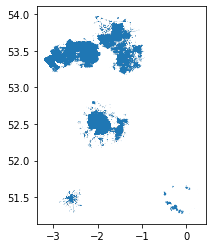

In [528]:
gdf_iso_eng.plot()

In [576]:
gdf_iso_stat['area_name'] = gdf_iso_stat[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

In [513]:
areas_ok = ['London',
'Sheffield',
'Bristol, City of',
'Manchester',
'Birmingham',
'Leeds',
'Leicester',
'Newcastle upon Tyne',
'Nottingham',
'Milton Keynes',
'Brighton and Hove',
'Bradford',
'Doncaster',
'Coventry',
'Southampton',
'Luton',
'Peterborough',
'Liverpool',
'York',
'Reading',
'Oxford',
'Bath',
'Cambridge']

In [516]:
gdf_iso_stat_ok[gdf_iso_stat_ok['area_name'].isin(areas_ok)][['captured_audience','hex_gid','geometry','area_name']].to_file('uk_iso_stat.geojson', driver='GeoJSON')

In [524]:
gdf_iso_stat_ok.area_name.value_counts()

Manchester               1016
Sheffield                 608
Salford                   423
Dudley                    396
Stockport                 266
Wolverhampton             249
Bristol, City of          138
South Staffordshire       133
Tameside                  119
Bolton                    113
Oldham                     90
Trafford                   74
Sandwell                   65
Wigan                      29
Birmingham                 28
Walsall                    28
Coventry                   25
Rochdale                   24
Warrington                 19
Solihull                   18
North East Derbyshire      15
Wirral                     14
Rotherham                   8
Epsom and Ewell             3
Nuneaton and Bedworth       3
St. Helens                  3
Cheshire East               2
Liverpool                   1
Bury                        1
London                      1
Spelthorne                  1
Name: area_name, dtype: int64

(array([ 91472., 119436., 168715., 155392., 113174.,  64208.,  26087.,
         16832.,   9199.,   2344.]),
 array([  441. ,  9768.6, 19096.2, 28423.8, 37751.4, 47079. , 56406.6,
        65734.2, 75061.8, 84389.4, 93717. ]),
 <BarContainer object of 10 artists>)

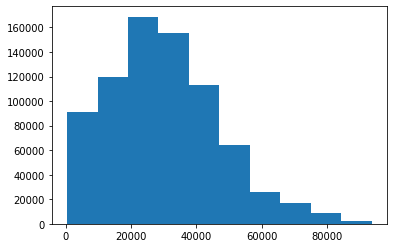

In [491]:
plt.hist(gdf_iso_stat['captured_audience'])

In [532]:
gdf_iso_stat_inter = gpd.sjoin(gdf_iso_stat_ok[['captured_audience','hex_gid','geometry','area_name']],gdf_iso_stat_ok[['captured_audience','hex_gid','geometry','area_name']], op='intersects', how='inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [534]:
 gdf_iso_stat_inter

,captured_audience_left,hex_gid_left,geometry,area_name_left,index_right,captured_audience_right,hex_gid_right,area_name_right
101,50108,8919420cc1bffff,"POLYGON ((-1.51617 53.43763, -1.51550 53.43786...",Sheffield,56294,86827,8919423968bffff,Sheffield
1422,66888,8919420cbdbffff,"POLYGON ((-1.55361 53.39409, -1.55235 53.39611...",Sheffield,56294,86827,8919423968bffff,Sheffield
3466,61242,8919420c893ffff,"POLYGON ((-1.51954 53.40992, -1.51879 53.41166...",Sheffield,56294,86827,8919423968bffff,Sheffield
4248,62856,8919420c863ffff,"POLYGON ((-1.53583 53.40448, -1.53432 53.40587...",Sheffield,56294,86827,8919423968bffff,Sheffield
4503,51546,8919420c8d7ffff,"POLYGON ((-1.52074 53.40960, -1.52069 53.40976...",Sheffield,56294,86827,8919423968bffff,Sheffield


In [536]:
gdf_iso_stat_inter=gdf_iso_stat_inter[gdf_iso_stat_inter['hex_gid_left']!=gdf_iso_stat_inter['hex_gid_right']]

In [575]:
gdf_iso_stat_ok.area_name.unique()

array(['Sheffield', 'Salford', 'Manchester', 'Bury', 'St. Helens',
       'Coventry', 'Solihull', 'Bolton', 'Wirral', 'Wigan',
       'South Staffordshire', 'Tameside', 'Oldham', 'Dudley', 'Sandwell',
       'Wolverhampton', 'Trafford', 'Stockport', 'Birmingham',
       'Liverpool', 'Rochdale', 'Walsall', 'Epsom and Ewell', 'London',
       'Rotherham', 'Nuneaton and Bedworth', 'Warrington',
       'Bristol, City of', 'North East Derbyshire', 'Cheshire East',
       'Spelthorne'], dtype=object)

In [568]:
dict_area_hexs_iso ={}
list_bests=[]
for area in gdf_iso_stat_ok.area_name.unique():
    print(area)
    best_hex = choose_best_iso(gdf_iso_stat_ok[gdf_iso_stat_ok.area_name==area], n=3)
    [list_bests.append(i) for i in best_hex]
    dict_area_hexs_iso[area]=best_hex

Sheffield
['8919420cc1bffff', '89194239043ffff'] 151
['8919420cc1bffff', '89194239043ffff', '89194276493ffff'] 0
Salford
['891951b2d43ffff', '891951b758bffff'] 1
['891951b2d43ffff', '891951b758bffff', '891951b08b3ffff'] 0
Manchester
['8919424de87ffff', '891951b620bffff'] 43
['8919424de87ffff', '891951b620bffff', '8919424d9b7ffff'] 0
Bury
St. Helens
Coventry
Solihull
Bolton
Wirral
Wigan
['891951b1c13ffff', '891951b86a7ffff'] 2
['891951b1c13ffff', '891951b86a7ffff', '891951bad4fffff'] 0
South Staffordshire
['89195c01dbbffff', '89195c0a987ffff'] 99
['89195c01dbbffff', '89195c0a987ffff', '89195c0d813ffff'] 0
Tameside
['89194279663ffff', '8919424cacbffff'] 96
Oldham
Dudley
['89195c0c57bffff', '89195c0f027ffff'] 189
['89195c0c57bffff', '89195c0f027ffff', '89195c0c88fffff'] 0
Sandwell
['89195c0e2d3ffff', '89195c0cebbffff'] 38
Wolverhampton
['89195c0f073ffff', '89195c0e01bffff'] 14
Trafford
['891951b7063ffff', '891951b081bffff'] 4
['891951b7063ffff', '891951b081bffff', '891951b532bffff'] 0
Sto

In [570]:
len(list_bests)

51

In [581]:
gdf_iso_stat_ok[gdf_iso_stat_ok.hex_gid.isin(list_bests)][['captured_audience','hex_gid','geometry','area_name']].to_file('iso_eng_best.geojson', driver='GeoJSON')

In [538]:
import itertools

In [622]:
def choose_best_iso(gdf_iso_stat_ok_part,gdf_iso_stat_inter, n=3):
    
    gdf_iso_stat_ok_part.sort_values('captured_audience', ascending=False)
    bests = [gdf_iso_stat_ok_part.iloc[0]['hex_gid']]
    k=1
    r=0
    hex_exclude = gdf_iso_stat_inter[gdf_iso_stat_inter['hex_gid_left'].isin(bests)]['hex_gid_right'].values+bests
    gdf_iso_stat_ok_part2 = gdf_iso_stat_ok_part[~gdf_iso_stat_ok_part.hex_gid.isin( hex_exclude)]
    while k<n and r<gdf_iso_stat_ok_part2.shape[0]:
        
        hex_gid_2 = gdf_iso_stat_ok_part2.iloc[r]['hex_gid']
        if hex_gid_2 not in gdf_iso_stat_inter[gdf_iso_stat_inter['hex_gid_left'].isin(bests)]['hex_gid_right'].values and hex_gid_2 not in bests:
            bests.append(hex_gid_2)
            print(bests, r)
            k+=1
            hex_exclude = gdf_iso_stat_inter[gdf_iso_stat_inter['hex_gid_left'].isin(bests)]['hex_gid_right'].values.tolist()+list(bests)
            gdf_iso_stat_ok_part2 = gdf_iso_stat_ok_part[~gdf_iso_stat_ok_part.hex_gid.isin( hex_exclude)]
            r=0
        else:
            r+=1
    return bests

In [557]:
gdf_iso_stat_inter['hex_gid_left'].values+['1']

array(['8919420cc1bffff1', '8919420cbdbffff1', '8919420c893ffff1', ...,
       '8919580cb13ffff1', '8919580cb0fffff1', '8919580cb8fffff1'],
      dtype=object)

In [584]:
gdf_iso_stat_bests = gdf_iso_stat_ok[gdf_iso_stat_ok.hex_gid.isin(list_bests)][['captured_audience','hex_gid','geometry','area_name']]

In [587]:
gdf_iso_london = greenplum("select t.* , st_astext(geometry) from snb_geo_lavka.hex_isochrones_bike t where name_en='London' and size_minutes=10")

In [591]:
gdf_iso_london['geometry']=gdf_iso_london['st_astext'].apply(lambda x: wkt.loads(x))
gdf_iso_london=gf.get_gdf(gdf_iso_london, 'geometry',4326 )

In [592]:
gdf_iso_stat_london = gpd.sjoin(gdf_iso_london,eng_data_indexes_lavka, op='intersects'  )

london_data_indexes_lavka_pop=gf.get_gdf(eng_data_indexes_lavka_pop,'geometry', 4326)

gdf_iso_stat_london['captured_audience'] = gdf_iso_stat_london.groupby('hex_gid')['Population aged 16-59: mid 2015 (excluding prisoners)'].transform('sum')

gdf_iso_stat__london_ok = gdf_iso_stat_london[gdf_iso_stat_london['captured_audience']>60000]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [630]:
gdf_iso_stat_london_ok = gdf_iso_stat_london[gdf_iso_stat_london['captured_audience']>40000]

In [632]:
gdf_iso_stat_london_ok['r'] = gdf_iso_stat_london_ok.groupby('hex_gid')['captured_audience'].rank('first')
gdf_iso_stat_london_ok=gdf_iso_stat_london_ok[gdf_iso_stat_london_ok['r']==1]

In [595]:
gdf_iso_stat_london_ok.shape

(22289, 71)

In [631]:
gdf_iso_stat_london_ok['area_name'] = gdf_iso_stat_london_ok[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [633]:
gdf_iso_stat_london_ok.shape

(2878, 73)

In [618]:
gdf_iso_stat_london_ok['area_name'].value_counts()

London    1091
Name: area_name, dtype: int64

In [634]:
gdf_iso_stat_inter_london = gpd.sjoin(gdf_iso_stat_london_ok[['captured_audience','hex_gid','geometry','area_name']],gdf_iso_stat_london_ok[['captured_audience','hex_gid','geometry','area_name']], op='intersects', how='inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [635]:

list_bests_l=[]
for area in gdf_iso_stat_london_ok.area_name.unique():
    print(area)
    best_hex = choose_best_iso(gdf_iso_stat_london_ok[gdf_iso_stat_london_ok.area_name==area],gdf_iso_stat_inter_london, n=50)
    [list_bests_l.append(i) for i in best_hex]
    dict_area_hexs_iso[area]=best_hex

London
['89194e68577ffff', '89194e6867bffff'] 20
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff', '89194ac33b7ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff'

['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff', '89194ac33b7ffff', '89194e6dccbffff', '89194e6d0bbffff', '89194e6936bffff', '89194ad0ad3ffff', '89194ada3b7ffff', '89194ad196bffff', '89195daca5bffff', '89195dac833ffff', '89194ad21b7ffff', '89194ad047bffff', '89195da65c3ffff', '89194e690dbffff', '89195da63a3ffff', '89195db49c3ffff', '89194ad0d2bffff', '89195da5387ffff', '89195da5253ffff', '89194ad1227ffff', '89194ad927bffff', '89195da4a87ffff', '89195da5d53ffff', '89195da4cb3ffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff', '89194ac33b7ffff', '89194e6dccbffff', '89194e6d0bbffff', '89194e6936bffff', '89194ad0ad3ffff', '89194ada3b7ffff', '89194ad196bffff', '89195daca5bffff', '89195dac833ffff', '89194ad21b7ffff', '89194ad047bffff', '89195da65c3ffff', '89194e690dbffff', '89195da

['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff', '89194ac33b7ffff', '89194e6dccbffff', '89194e6d0bbffff', '89194e6936bffff', '89194ad0ad3ffff', '89194ada3b7ffff', '89194ad196bffff', '89195daca5bffff', '89195dac833ffff', '89194ad21b7ffff', '89194ad047bffff', '89195da65c3ffff', '89194e690dbffff', '89195da63a3ffff', '89195db49c3ffff', '89194ad0d2bffff', '89195da5387ffff', '89195da5253ffff', '89194ad1227ffff', '89194ad927bffff', '89195da4a87ffff', '89195da5d53ffff', '89195da4cb3ffff', '89194ac3457ffff', '89194ac14c3ffff', '89194ad345bffff', '89194e69ab3ffff', '89194ad358fffff', '89194e699b3ffff', '89194ada643ffff', '89195da7587ffff', '89194ad8c23ffff', '89195daeaabffff', '89194ad9473ffff', '89194ad93afffff'] 0
['89194e68577ffff', '89194e6867bffff', '89195da4393ffff', '89195da5517ffff', '89195da44cfffff', '89194e6a983ffff', '89194e68da3ffff', '89194e618b3ffff', '89194ac33b7ffff', '89194e6

In [636]:
len(list_bests_l)

48

<AxesSubplot:>

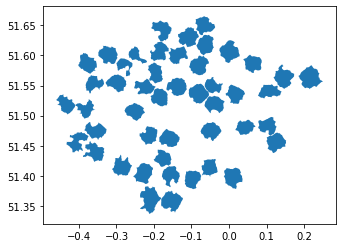

In [637]:
gdf_iso_stat_london_ok[gdf_iso_stat_london_ok.hex_gid.isin(list_bests_l)].plot()

In [ ]:
gdf_iso_stat_london_ok

<AxesSubplot:>

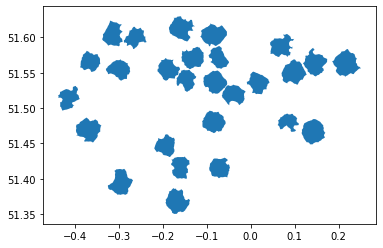

In [629]:
gdf_iso_stat_london_ok[gdf_iso_stat_london_ok.hex_gid.isin(list_bests_l)].plot()

In [638]:
gdf_iso_stat_london_ok[gdf_iso_stat_london_ok.hex_gid.isin( list_bests_l)][['captured_audience','hex_gid','geometry','area_name']].to_file('iso_london_best.geojson', driver='GeoJSON')

In [640]:
gdf_iso_stat_ok[gdf_iso_stat_ok['captured_audience']>30000][['captured_audience','hex_gid','geometry','area_name']].to_file('iso_eng_aud30000.geojson', driver='GeoJSON')

In [613]:
 best_eng_hex = choose_best_iso(gdf_iso_stat_ok[gdf_iso_stat_ok.hex_gid.isin(list_bests)], n=60)

['8919420cc1bffff', '891951b2d43ffff'] 1
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff', '89194239043ffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff', '89194239043ffff', '89194276493ffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff', '89194

['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff', '89194239043ffff', '89194276493ffff', '891951b33c7ffff', '8919510ec57ffff', '891951b1c13ffff', '89195c01dbbffff', '89194279663ffff', '8919424cacbffff', '89195c0c57bffff', '89195c0f027ffff', '891951b4c7bffff', '891951b42a3ffff', '891951b532bffff', '891951b86a7ffff', '89195c39507ffff', '89195c0c88fffff', '89195104683ffff', '89195c0a987ffff', '89194ac16dbffff', '89195c0d813ffff', '89194238683ffff', '89194205ab3ffff', '891951a13afffff', '891951bad4fffff'] 0
['8919420cc1bffff', '891951b2d43ffff', '891951b758bffff', '891951b08b3ffff', '891951ab08bffff', '89195cadea7ffff', '89195c31277ffff', '89194239043ffff', '89194276493ffff', '891951b33c7ffff', '8919510ec57ffff', '891951b1c13ffff', '89195c01dbbffff', '89194279663ffff', '8919424cacbffff', '89195c0c57bffff', '89195c0f027ffff', '891951b4c7bffff', '891951b42a3ffff', '891951b532bffff', '891951b86a7ffff', '89195c3

In [656]:
all_uk_zones = gpd.read_file('all_uk_proposed.geojson', driver='GeoJSON')

In [667]:
all_uk_zones['zone_id'] = all_uk_zones[['external_id','objectid']].apply(lambda x: x['objectid'] if ~pd.isnull( x['objectid']) else ( x['external_id'] if ~pd.isnull( x['external_id']) else 0), axis=1)

In [673]:
all_uk_zones[['external_id','objectid']].apply(lambda x: x['objectid'] if pd.isnull( x['objectid'])==False else ( x['external_id'] if pd.isnull( x['external_id'])==False else 0), axis=1)

0                   104
lnd23                 2
lnd18                 2
lnd12                 2
lnd33                 2
lnd24                 1
lnd25                 1
lnd27                 1
lnd28                 1
lnd29                 1
lnd30                 1
lnd31                 1
lnd32                 1
brighton_3            1
lnd35                 1
lnd36                 1
483606                1
497631                1
454206                1
483541                1
cardiff1              1
birm1                 1
birm2                 1
birm3                 1
manch4                1
lnd34                 1
lnd21                 1
lnd22                 1
lnd8                  1
brighton_2            1
lnd_proposal1         1
lnd_propose2          1
london_propose3       1
lnd_propose_4         1
london_propose_5      1
lnd_5                 1
lnd_6                 1
lnd_7                 1
lnd9                  1
lnd20                 1
london9               1
lnd10           

In [668]:
all_uk_zones['zone_id'].value_counts()

brighton_3    1
brighton_2    1
cardiff1      1
birm1         1
birm2         1
birm3         1
manch4        1
mk            1
Name: zone_id, dtype: int64

In [659]:
gpd.sjoin(eng_data_indexes_lavka,all_uk_zones, how='inner', op='intersects')

,objectid_left,lsoa11cd_left,lsoa11nm_left,lsoa11nmw_left,st_areasha_left,st_lengths_left,LSOA code (2011)_left,LSOA name (2011)_left,Local Authority District code (2019)_left,Local Authority District name (2019)_left,...,address,store_id,zone_id,status_zone,delivery_type,captured_audience,hex_gid,area_name_right,layer,path
2,197,E01000201,Barnet 028C,Barnet 028C,393131.730208,3703.148989,E01000201,Barnet 028C,E09000003,Barnet,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
743,294,E01000298,Barnet 023D,Barnet 023D,267817.390839,3317.434918,E01000298,Barnet 023D,E09000003,Barnet,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
1095,299,E01000303,Barnet 020D,Barnet 020D,212278.042126,3501.237037,E01000303,Barnet 020D,E09000003,Barnet,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
1594,210,E01000214,Barnet 038E,Barnet 038E,334547.318356,3516.010402,E01000214,Barnet 038E,E09000003,Barnet,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
2595,206,E01000210,Barnet 033E,Barnet 033E,501392.992446,4129.505973,E01000210,Barnet 033E,E09000003,Barnet,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,2662,E01002723,Islington 022C,Islington 022C,103378.857396,1642.663422,E01002723,Islington 022C,E09000019,Islington,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
12695,2,E01000002,City of London 001B,City of London 001B,226191.272990,2433.960112,E01000002,City of London 001B,E09000001,City of London,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
19704,4569,E01004688,Westminster 019B,Westminster 019B,749831.513574,5678.430739,E01004688,Westminster 019B,E09000033,Westminster,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...
25341,2644,E01002704,Islington 023D,Islington 023D,333024.631355,3023.108586,E01002704,Islington 023D,E09000019,Islington,...,None,None,None,None,None,NaN,None,None,lavka_zones_lnd_0612,/Users/intra26/Desktop/лавка/данные и карты по...


In [ ]:
# def choose_best_iso(gdf_iso_stat_ok_part, n=3):
#     sum_v=0
#     best_hex =[]
#     for hex_gid in gdf_iso_stat_ok_part['hex_gid']:
        
#         sum_v = gdf_iso_stat_ok_part[gdf_iso_stat_ok_part['hex_gid']==hex_gid]['captured_audience']
#         sum2=0
#         best_hex.append(hex_gid)
#         for hex_gid_2 in gdf_iso_stat_ok_part['hex_gid']:
#             if hex_gid_2!=hex_gid and hex_gid_2 not in gdf_iso_stat_inter[gdf_iso_stat_inter['hex_gid_left']==hex_gid]['hex_gid_right']:
#                 if gdf_iso_stat_ok_part[gdf_iso_stat_ok_part['hex_gid']==hex_gid_2]['captured_audience']
#                 sum2=gdf_iso_stat_ok_part[gdf_iso_stat_ok_part['hex_gid']==hex_gid_2]['captured_audience']
#                 second_best= hex_gid_2
                

#### 20.01.2022 new zones

In [17]:
lnd_zones = gpd.read_file('new_london_zones_2001.geojson')

In [1188]:
lnd_zones.to_crs('epsg:2395').geometry.area//(10**6)

0    49.0
1    42.0
2    57.0
dtype: float64

In [1189]:
lnd_zones

,layer,path,geometry
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177..."
1,"Unit 18,16 (jointed) Swan Industrial Estate, ...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.19154 51.47262, -0.18952 51.47105..."
2,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.03119 51.46633, -0.02962 51.46521..."


In [691]:
gdf_eng_data_indexes['area_name'] =  gdf_eng_data_indexes[['LSOA code (2011)','Local Authority District name (2019)']].apply(lambda x:'London' if x['LSOA code (2011)'] in lsoa_london[lsoa_london.columns[0]].values else x['Local Authority District name (2019)'], axis=1  )

In [687]:
lnd_zones_lsoa = gpd.sjoin(lnd_zones, gdf_eng_data_indexes, how='inner', op='contains')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [694]:
gdf_eng_data_indexes.groupby('area_name')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum().loc['London']

5553675

In [696]:
lnd_zones_lsoa['pop_density'] = lnd_zones_lsoa['Population aged 16-59: mid 2015 (excluding prisoners)']/lnd_zones_lsoa['lsoa_area']

In [697]:
lnd_zones_lsoa.groupby('layer')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()/lnd_zones_lsoa.groupby('layer')['lsoa_area'].sum()

layer
Castle Road, London NW1 8SS, UK                                          9413.178337
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON    4428.650524
Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR                   6445.414799
dtype: float64

In [699]:
lnd_zones_lsoa.groupby('layer')['pop_density'].quantile([0.1, 0.25,0.5,0.75])

layer                                                                      
Castle Road, London NW1 8SS, UK                                        0.10     5896.964934
                                                                       0.25     8898.212791
                                                                       0.50    11134.679429
                                                                       0.75    13863.376661
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON  0.10     2686.924398
                                                                       0.25     3791.500157
                                                                       0.50     5177.996192
                                                                       0.75     6867.261446
Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR                 0.10     3613.897152
                                                                       0.25     5361.031537
    

In [877]:
lnd_zones_imd_stat = lnd_zones_lsoa.groupby('layer')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum().to_frame().join(lnd_zones_lsoa.groupby('layer')['pop_density'].mean().to_frame())

In [885]:
lnd_zones_imd_stat = lnd_zones_imd_stat.join((lnd_zones_lsoa.groupby('layer')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()/lnd_zones_lsoa.groupby('layer')['lsoa_area'].sum()).to_frame())
lnd_zones_imd_stat.columns = ['pop_16_59','pop_density_mean','pop_density_zone']

In [889]:
gdf_lnd_zones_imd_stat=lnd_zones_imd_stat.reset_index().merge(lnd_zones, on='layer')
gdf_lnd_zones_imd_stat=gf.get_gdf(gdf_lnd_zones_imd_stat, 'geometry', 4326)

In [893]:
gdf_lnd_zones_imd_stat.to_file('gdf_lnd_zones_2001_imd_stat.geojson', driver='GeoJSON')

In [870]:
lnd_zones_lsoa.groupby('layer')['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

layer
Castle Road, London NW1 8SS, UK                                          276775
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON    148780
Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR                   156485
Name: Population aged 16-59: mid 2015 (excluding prisoners), dtype: int64

In [895]:
gdf_stores = gpd.read_file('london_stores_coords_2201.geojson')

In [906]:
gdf_hex = greenplum("select hex_gid, st_astext(geometry) from snb_geo_lavka.hex_grid where name_en='London'")

In [910]:
gdf_hex['geometry'] =gdf_hex[ 'st_astext'].apply(lambda x: wkt.loads(x))
gdf_hex=gf.get_gdf(gdf_hex,'geometry',4326)

In [912]:
gdf_hex_stores = gpd.sjoin(gdf_hex,gdf_stores , how='inner' )

In [918]:
gdf_iso_stat['hex_gid']

0        891951a736fffff
7337     891951a7367ffff
11972    891951a51dbffff
15038    891951a732bffff
19397    891951a733bffff
              ...       
68351    89195d36a93ffff
68351    89195d36a93ffff
68351    89195d36a93ffff
68351    89195d36a93ffff
69447    891951175cfffff
Name: hex_gid, Length: 766859, dtype: object

In [920]:
gdf_hex_stores.hex_gid

397     89194ad0e8bffff
4308    89195da4c17ffff
5690    89194ada803ffff
Name: hex_gid, dtype: object

In [944]:
hex_10m_bike = greenplum("select t.hex_gid, t.ttl_residents from snb_geo_lavka.hex_socdem_isochrones t where size_minutes=10")

In [1007]:
gdf_hex_socdem = greenplum("""
select s.ttl_residents_real, st_astext, hex_gid from snb_geo_lavka.hex_socdem s
join (select hex_gid,
                 st_astext(geometry)
    from snb_geo_lavka.hex_grid where name_en='London') as t
using (hex_gid)""")

In [1009]:
gdf_hex_socdem['geometry'] = gdf_hex_socdem[ 'st_astext'].apply(lambda x: wkt.loads(x))
gdf_hex_socdem=gf.get_gdf(gdf_hex_socdem,'geometry',4326)

In [1018]:
gdf_hex_socdem['centre_point'] = gdf_hex_socdem['geometry'].apply(lambda x: x.centroid)

In [1019]:
gdf_hex_socdem_zones = gpd.sjoin(gdf_hex_socdem.set_geometry('centre_point'),lnd_zones, op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [1021]:
gdf_hex_socdem_zones['x']= gdf_hex_socdem_zones['centre_point'].x
gdf_hex_socdem_zones['y']= gdf_hex_socdem_zones['centre_point'].y

In [1029]:
gdf_hex_socdem_zones.rename(columns ={'layer':'zone_name'}, inplace=True)

In [1031]:
greenplum.write(gdf_hex_socdem_zones[['hex_gid','ttl_residents_real','x','y','zone_name']],'analyst.iat_zones_hex_residents')

In [1025]:
gdf_stores['x']=gdf_stores.geometry.x
gdf_stores['y']=gdf_stores.geometry.y

In [1027]:
greenplum.write(gdf_stores[['zone_name','geometry','x','y']],'analyst.iat_new_stores_latlong')

In [934]:
gdf_hex_stores_stat = gdf_hex_stores.merge(gdf_iso_london, on='hex_gid').merge(hex_10m_bike, on='hex_gid')

In [939]:
gdf_hex_stores_stat= gf.get_gdf(gdf_hex_stores_stat, 'geometry_y', 4326)

In [942]:
gdf_hex_stores_stat.columns

Index(['hex_gid', 'st_astext_x', 'geometry_x', 'index_right', 'zone_name',
       'lat', 'long', 'geometry_y', 'size_minutes', 'name_en', 'st_astext_y',
       'ttl_residents'],
      dtype='object')

In [943]:
gdf_hex_stores_stat[['hex_gid','geometry_y','ttl_residents','zone_name']].to_file('new_lnd_stores_10min_stat.geojson', driver='GeoJSON')

### Текущие зоны лавок

In [1731]:
gdf_orders_lnd = greenplum("""
with ord as (
    select order_nr,
           st_setsrid(st_makepoint(t1.order_location_lon, t1.order_location_lat),4326) as geometry,
           date_trunc('month', utc_created_dttm),
           place_id::text as place_id,
           cte_dur_sec
    from eda_cdm_marketplace.dm_lavka_order t1
    where region_name = 'Лондон'
      and confirmed_flg
      and (not parcel_market_flg or parcel_market_flg is null)
      and cancel_reason_text is null
      and date_trunc('day', utc_created_dttm) >= '2022-01-16'
)
select order_nr,
       st_astext(ord.geometry) as geometry_order,
       st_distance(st_transform(ord.geometry,2395),st_transform(ls.geometry,2395)) as distance,
       date_trunc,
       place_id,
       st_astext(ls.geometry)  as geometry_store,
       cte_dur_sec
from ord
join snb_geo_lavka.lavka_stores ls on ls.external_id=ord.place_id
and status='active'""")

In [1732]:
gdf_orders_lnd['geometry_order'] = gdf_orders_lnd['geometry_order'].apply(lambda x: wkt.loads(x))

In [1733]:
gdf_orders_lnd.dtypes

order_nr                  object
geometry_order            object
distance                 float64
date_trunc        datetime64[ns]
place_id                  object
geometry_store            object
cte_dur_sec              float64
dtype: object

In [1734]:
gdf_orders_lnd.groupby(['place_id','date_trunc']).size().groupby(['date_trunc']).mean()

date_trunc
2022-01-01    2504.75
2022-02-01      56.25
dtype: float64

In [1176]:
lavka_zones = greenplum('''
select z.*, st_astext(z.geometry)as geometry_zone from snb_geo_lavka.lavka_zones z
join snb_geo_lavka.lavka_stores using (store_id)
where z.status_zone='active' and status='active' and z.cluster='Лондон'--and delivery_type='foot'
''')

lavka_zones ['geometry_zone']=lavka_zones ['geometry_zone'].apply(lambda x: wkt.loads(x))
gdf_lavka_zones=gpd.GeoDataFrame(lavka_zones, crs='epsg:4326', geometry='geometry_zone')

In [1178]:
gdf_lavka_zones_socdem = gpd.sjoin(gdf_lavka_zones,gdf_hex_socdem, op='contains')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


title
11 Kendal Court        210786.0
25A Cudworth Street    208266.0
3 Almond Road          189725.0
77 Queens Circus       296056.0
Name: ttl_residents_real, dtype: float64

In [1179]:
gdf_lavka_zones_socdem.groupby('title')['ttl_residents_real'].sum().mean()

226208.25

In [1186]:
(gdf_lavka_zones_socdem.groupby('title')['ttl_residents_real'].sum()/(gdf_lavka_zones.set_index('title').to_crs('epsg:2395').geometry.area/(10**6))).mean()

7691.805682258617

In [1736]:
gdf_orders_lnd = gf.get_gdf(gdf_orders_lnd,'geometry_order', 4326)

In [1737]:
gdf_orders_lnd_lsoa = gpd.sjoin(gdf_eng_data_indexes[['Population aged 16-59: mid 2015 (excluding prisoners)','geometry','lsoa11cd']],gdf_orders_lnd)

In [1738]:
gdf_orders_lnd_lsoa = gdf_orders_lnd_lsoa.groupby(['lsoa11cd','date_trunc','place_id'])[['distance','Population aged 16-59: mid 2015 (excluding prisoners)','cte_dur_sec']].mean().join(gdf_orders_lnd_lsoa.groupby(['lsoa11cd','date_trunc','place_id'])['order_nr'].size()).reset_index()

In [1739]:
gdf_orders_lnd_lsoa

,lsoa11cd,date_trunc,place_id,distance,Population aged 16-59: mid 2015 (excluding prisoners),cte_dur_sec,order_nr
0,E01000002,2022-01-01,454206,2637.697720,580.0,1531.375000,8
1,E01000005,2022-01-01,454206,2113.058586,692.0,1237.454545,11
2,E01000471,2022-01-01,497631,1852.685092,1054.0,1140.000000,2
3,E01000472,2022-01-01,497631,1953.286594,1055.0,1078.214286,15
4,E01000473,2022-01-01,497631,2741.183484,1504.0,1469.000000,2
...,...,...,...,...,...,...,...
718,E01033712,2022-01-01,454206,1437.160010,1302.0,1018.285714,14
719,E01033727,2022-01-01,483606,3409.039035,2272.0,1732.400000,5
720,E01033728,2022-01-01,483606,3060.414855,1426.0,1297.000000,26
721,E01033728,2022-02-01,483606,2942.978690,1426.0,882.000000,1


In [1740]:
gdf_orders_lnd_lsoa['penetration'] =(gdf_orders_lnd_lsoa['order_nr']*2)/gdf_orders_lnd_lsoa['Population aged 16-59: mid 2015 (excluding prisoners)']

In [1741]:
gdf_orders_lnd_lsoa.groupby(['place_id','date_trunc'])['order_nr'].sum()/gdf_orders_lnd_lsoa.groupby(['place_id','date_trunc'])['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

place_id  date_trunc
454206    2022-01-01    0.016302
          2022-02-01    0.001062
483541    2022-01-01    0.011117
          2022-02-01    0.001423
483606    2022-01-01    0.012457
          2022-02-01    0.001184
497631    2022-01-01    0.011957
          2022-02-01    0.001412
dtype: float64

In [1173]:
gdf_orders_lnd_lsoa.groupby(['place_id','date_trunc'])['lsoa11cd'].nunique()

place_id  date_trunc
454206    2021-09-01     61
          2021-10-01    122
          2021-11-01    137
          2021-12-01    140
          2022-01-01    144
483541    2021-09-01     22
          2021-10-01    145
          2021-11-01    188
          2021-12-01    210
          2022-01-01    199
483606    2021-09-01     14
          2021-10-01     69
          2021-11-01    107
          2021-12-01    129
          2022-01-01    134
497631    2021-10-01     45
          2021-11-01     87
          2021-12-01    116
          2022-01-01    132
Name: lsoa11cd, dtype: int64

In [987]:
gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-11-01'][['penetration','distance']].corr()

,penetration,distance
penetration,1.000000,-0.235178
distance,-0.235178,1.000000


In [1742]:
gdf_orders_lnd_lsoa['cte_min']=gdf_orders_lnd_lsoa['cte_dur_sec']/60

In [1744]:
gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2022-01-01'].groupby(pd.qcut(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2022-01-01']['distance'], q=8))['cte_min','penetration'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cte_min,penetration
distance,,
"(64.21199999999999, 1173.624]",12.711338,0.072740
"(1173.624, 1630.242]",16.789375,0.026690
"(1630.242, 1993.213]",18.264601,0.026199
"(1993.213, 2303.685]",19.668163,0.018233
"(2303.685, 2591.79]",19.973182,0.017071
"(2591.79, 2975.66]",21.084328,0.017083
"(2975.66, 3409.039]",22.100409,0.014969
"(3409.039, 7491.532]",25.517869,0.015552


In [1752]:
gdf_orders_lnd_lsoa['distance_bin'] = ((gdf_orders_lnd_lsoa['distance']//500+1)*500).apply(lambda x: '4000+' if x>4000 else x)

In [1754]:
gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2022-01-01'].groupby('distance_bin')['cte_min','penetration'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cte_min,penetration
distance_bin,,
500.0,8.159350,0.087958
1000.0,13.083855,0.025617
1500.0,15.380159,0.021778
2000.0,18.041119,0.018371
2500.0,19.358889,0.014545
3000.0,20.591667,0.011091
3500.0,21.439333,0.009036
4000.0,24.555556,0.010020
4000+,23.558216,0.007245


In [1060]:
ch_dist_penetration = gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01'].groupby(pd.qcut(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['distance'], q=6))['cte_min','penetration'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [1758]:
gdf_orders_lnd_lsoa = gdf_orders_lnd_lsoa.merge(gdf_eng_data_indexes[['lsoa11cd','geometry']], on='lsoa11cd')

In [1759]:
gdf_orders_lnd_lsoa = gf.get_gdf(gdf_orders_lnd_lsoa,'geometry', 4326)

In [1760]:
gdf_orders_lnd_lsoa

,lsoa11cd,date_trunc,place_id,distance,Population aged 16-59: mid 2015 (excluding prisoners),cte_dur_sec,order_nr,penetration,cte_min,distance_bin,geometry
0,E01000002,2022-01-01,454206,2637.697720,580.0,1531.375000,8,0.027586,25.522917,3000.0,"POLYGON ((-0.08810 51.51941, -0.08927 51.51752..."
1,E01000005,2022-01-01,454206,2113.058586,692.0,1237.454545,11,0.031792,20.624242,2500.0,"POLYGON ((-0.07320 51.51000, -0.07551 51.50974..."
2,E01000471,2022-01-01,497631,1852.685092,1054.0,1140.000000,2,0.003795,19.000000,2000.0,"POLYGON ((-0.28943 51.53924, -0.28773 51.53736..."
3,E01000472,2022-01-01,497631,1953.286594,1055.0,1078.214286,15,0.028436,17.970238,2000.0,"POLYGON ((-0.29811 51.53994, -0.29892 51.53924..."
4,E01000473,2022-01-01,497631,2741.183484,1504.0,1469.000000,2,0.002660,24.483333,3000.0,"POLYGON ((-0.29386 51.54640, -0.29560 51.54563..."
...,...,...,...,...,...,...,...,...,...,...,...
718,E01033712,2022-01-01,454206,1437.160010,1302.0,1018.285714,14,0.021505,16.971429,1500.0,"POLYGON ((-0.05803 51.53877, -0.05758 51.53792..."
719,E01033727,2022-01-01,483606,3409.039035,2272.0,1732.400000,5,0.004401,28.873333,3500.0,"POLYGON ((-0.02285 51.48411, -0.02297 51.48348..."
720,E01033728,2022-01-01,483606,3060.414855,1426.0,1297.000000,26,0.036466,21.616667,3500.0,"POLYGON ((-0.02486 51.48555, -0.02005 51.48382..."
721,E01033728,2022-02-01,483606,2942.978690,1426.0,882.000000,1,0.001403,14.700000,3000.0,"POLYGON ((-0.02486 51.48555, -0.02005 51.48382..."


In [1761]:
gdf_orders_lnd_lsoa.to_file('gdf_orders_lnd_lsoa.geojson', driver='GeoJSON')

#### здесь нужно замоделировать число заказов от расстояния и населения

In [1037]:
lnd_zones_lsoa

,layer,path,geometry,index_right,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,...,Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),pop_density,lsoa_area
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",27813,898,E01000915,Camden 027A,Camden 027A,74007.907008,1816.724907,...,2.017,386,1,1653,326,1053,274,1067,14220.472470,0.074048
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",26599,903,E01000920,Camden 027D,Camden 027D,136032.421498,1972.999182,...,1.673,1082,1,2107,239,1524,344,1579,11197.119485,0.136106
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",10571,919,E01000936,Camden 024A,Camden 024A,87824.074293,1481.967121,...,2.025,378,1,1835,298,1303,234,1313,14828.413397,0.087872
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",10310,923,E01000940,Camden 024D,Camden 024D,49132.776916,1357.837311,...,1.995,421,1,1354,199,970,185,974,19731.685723,0.049160
0,"Castle Road, London NW1 8SS, UK",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",5477,2668,E01002729,Islington 021E,Islington 021E,132605.147398,1868.381619,...,2.321,82,1,1731,222,1206,303,1229,9089.730437,0.132677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.03119 51.46633, -0.02962 51.46521...",4880,3157,E01003225,Lewisham 015A,Lewisham 015A,214086.341673,2855.231892,...,1.057,3753,2,1641,350,1054,237,1050,4920.548836,0.214204
2,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.03119 51.46633, -0.02962 51.46521...",918,3249,E01003322,Lewisham 020D,Lewisham 020D,148872.630745,1564.204049,...,1.463,1750,1,1560,321,1039,200,1047,6975.301771,0.148954
2,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.03119 51.46633, -0.02962 51.46521...",4133,3205,E01003275,Lewisham 014C,Lewisham 014C,194199.933742,2693.363709,...,1.120,3377,2,1730,324,1077,329,1063,5542.789991,0.194306
2,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",/Users/intra26/Desktop/лавка/оценка потенциала...,"POLYGON ((-0.03119 51.46633, -0.02962 51.46521...",8550,3165,E01003233,Lewisham 015D,Lewisham 015D,139905.496985,2897.200267,...,1.258,2654,1,1785,375,1191,219,1199,8508.220387,0.139982


In [1039]:
lnd_zones_lsoa = gdf_eng_data_indexes[['lsoa11cd','geometry','Population aged 16-59: mid 2015 (excluding prisoners)']].merge(lnd_zones_lsoa[['lsoa11cd','layer']],on='lsoa11cd', suffixes=('_lsoa','_zone'))

In [1042]:
gdf_lnd_zones_lsoa = gf.get_gdf(lnd_zones_lsoa,'geometry',4326)

In [1055]:
gdf_stores.zone_name.iloc[0]

'Castle Road, London NW1 8SS, UK'

In [1056]:
gdf_lnd_zones_lsoa['distance']=0
for zn in gdf_stores.zone_name.unique():
    gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.layer==zn,'distance'] = gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.layer==zn].to_crs('epsg:2395').geometry.distance( gdf_stores.to_crs('epsg:2395')[gdf_stores.zone_name==zn].geometry.iloc[0])

(array([20., 28., 48., 52., 65., 65., 81., 67., 54.,  9.]),
 array([   0.        ,  397.46381595,  794.92763191, 1192.39144786,
        1589.85526382, 1987.31907977, 2384.78289573, 2782.24671168,
        3179.71052764, 3577.17434359, 3974.63815955]),
 <BarContainer object of 10 artists>)

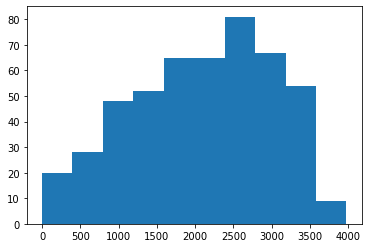

In [1059]:
plt.hist(gdf_lnd_zones_lsoa['distance'])

In [1061]:
gdf_lnd_zones_lsoa.rename([])

,lsoa11cd,geometry,Population aged 16-59: mid 2015 (excluding prisoners),layer,distance
0,E01000870,"POLYGON ((-0.13252 51.54724, -0.13301 51.54691...",1241,"Castle Road, London NW1 8SS, UK",427.410056
1,E01003353,"POLYGON ((-0.00214 51.42919, -0.00173 51.42882...",1118,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",1893.719970
2,E01003401,"POLYGON ((-0.20504 51.42635, -0.20436 51.42580...",873,"Unit 18,16 (jointed) Swan Industrial Estate, ...",1369.906194
3,E01004497,"POLYGON ((-0.17868 51.43932, -0.17867 51.43825...",903,"Unit 18,16 (jointed) Swan Industrial Estate, ...",677.432737
4,E01004614,"POLYGON ((-0.17573 51.43076, -0.17543 51.43058...",1559,"Unit 18,16 (jointed) Swan Industrial Estate, ...",807.442112
...,...,...,...,...,...
484,E01004613,"POLYGON ((-0.16257 51.43277, -0.16036 51.43168...",1003,"Unit 18,16 (jointed) Swan Industrial Estate, ...",1503.542662
485,E01003313,"POLYGON ((-0.04645 51.43401, -0.04625 51.43335...",1004,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",851.548352
486,E01004478,"POLYGON ((-0.15488 51.45635, -0.15318 51.45520...",965,"Unit 18,16 (jointed) Swan Industrial Estate, ...",3133.325289
487,E01004611,"POLYGON ((-0.15770 51.42960, -0.15806 51.42942...",1023,"Unit 18,16 (jointed) Swan Industrial Estate, ...",1921.594046


In [1063]:
ch_dist_penetration.reset_index(inplace=True)

In [1104]:
ch_dist_penetration

,distance,cte_min,penetration
0,"(7.439, 1381.716]",16.692535,0.043441
1,"(1381.716, 1897.56]",19.892902,0.015431
2,"(1897.56, 2307.072]",22.503220,0.013032
3,"(2307.072, 2691.996]",23.727650,0.012425
4,"(2691.996, 3238.868]",24.948602,0.011892
5,"(3238.868, 6745.331]",29.315592,0.010498


In [1071]:
gdf_lnd_zones_lsoa.rename(columns = {'Population aged 16-59: mid 2015 (excluding prisoners)':'pop_16_59'}, inplace=True)

In [1088]:
(x>ch_dist_penetration['distance'].apply(lambda x: float(x.left)).astype(float))&(x<=ch_dist_penetration['distance'].apply(lambda x: float(x.right)).astype(float))

0     True
1    False
2    False
3    False
4    False
5    False
Name: distance, dtype: bool

In [1089]:
x=500


0    0.043441
Name: penetration, dtype: float64

In [1711]:
ch_dist_penetration = gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01'].groupby(pd.qcut(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['distance'], q=11))['cte_min','penetration'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [1712]:
ch_dist_penetration

,distance,cte_min,penetration
0,"(7.439, 1062.834]",15.443843,0.061990
1,"(1062.834, 1449.201]",18.714920,0.020150
2,"(1449.201, 1731.98]",19.167824,0.013383
3,"(1731.98, 1984.087]",21.065637,0.017533
4,"(1984.087, 2216.341]",22.633370,0.014485
5,"(2216.341, 2392.446]",23.063364,0.009916
6,"(2392.446, 2619.928]",23.973305,0.013129
7,"(2619.928, 2868.864]",25.108367,0.011044
8,"(2868.864, 3173.176]",24.570956,0.012705
9,"(3173.176, 3588.859]",27.866871,0.008224


In [1118]:
0.015/0.007-1

1.1428571428571428

In [1154]:
gdf_lnd_zones_lsoa['penetration'] =gdf_lnd_zones_lsoa['distance'].apply(lambda x:ch_dist_penetration.loc[(x>ch_dist_penetration['distance'].apply(lambda x: float(x.left)).astype(float))&(x<=ch_dist_penetration['distance'].apply(lambda x: float(x.right)).astype(float)),'penetration'].values[0]if x>7 else 0.06)

gdf_lnd_zones_lsoa['orders_predicted'] = gdf_lnd_zones_lsoa['penetration']*gdf_lnd_zones_lsoa['pop_16_59']

gdf_lnd_zones_lsoa.to_file('gdf_lnd_zones_lsoa_order_predict.geojson', driver='GeoJSON')

gdf_lnd_zones_lsoa.groupby('layer')['orders_predicted'].sum()

layer
Castle Road, London NW1 8SS, UK                                          5954.802078
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON    3042.791333
Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR                   3476.192746
Name: orders_predicted, dtype: float64

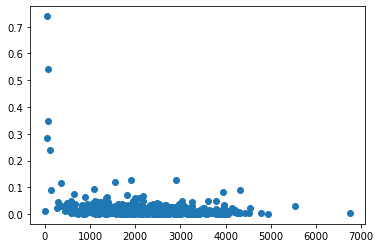

In [1126]:
plt.scatter(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['distance'],gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['penetration'])

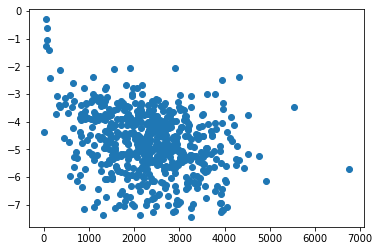

In [1128]:
plt.scatter(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['distance'],np.log(gdf_orders_lnd_lsoa[gdf_orders_lnd_lsoa.date_trunc=='2021-12-01']['penetration']))

In [1143]:
df = gdf_orders_lnd_lsoa[(gdf_orders_lnd_lsoa.date_trunc=='2021-12-01')&(gdf_orders_lnd_lsoa.penetration<0.2)]

In [1144]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

def build_ols(data, x_vars,y_var, if_y_log=True):
    X_aud = data[x_vars]
    
    if if_y_log:
        y_aud = np.log(1/(1-data[y_var]))
    else:
        y_aud = data[y_var]
        
    X = add_constant(X_aud)
    
    print(y_aud.mean())

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    print(vif)

    model_aud= sm.OLS(y_aud,X).fit()
    print(model_aud.summary())
    plt.scatter(model_aud.resid,model_aud.predict())
    plt.ylabel('Fitted')
    plt.xlabel('residuals')
    
    plt.show()
    
    plt.scatter(y_aud,model_aud.predict())
    plt.ylabel('predict')
    plt.xlabel('fact')
    plt.show()
    sm.qqplot(model_aud.predict())
#     sm.stats
    plt.show()
    
    return model_aud

penetration    0.014586
dtype: float64
   VIF Factor  features
0    7.272677     const
1    1.000000  distance
                            OLS Regression Results                            
Dep. Variable:            penetration   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     28.13
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           1.61e-07
Time:                        18:39:30   Log-Likelihood:                 1567.3
No. Observations:                 590   AIC:                            -3131.
Df Residuals:                     588   BIC:                            -3122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

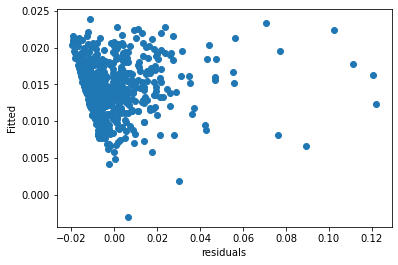

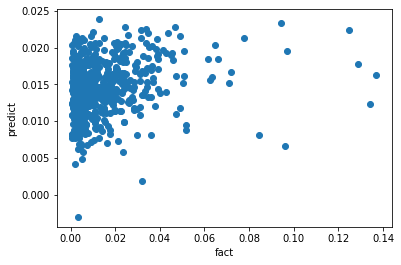

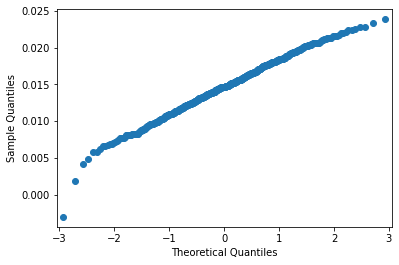

In [1145]:
build_ols(df, ['distance'],['penetration'], if_y_log=True)

In [1125]:
gdf_orders_lnd_lsoa['penetration'].dtype

dtype('float64')

### Определяем оптимальные границы зоны с помощью матрицы соседей и населения

#### идем от центра и перебираем соседей, пересчитывая плотность на площадь и проверяя, что население не менее 65тыс

<AxesSubplot:>

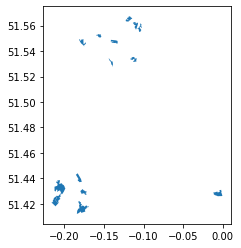

In [1227]:
gdf_lnd_zones_lsoa.head(15).plot()

In [1231]:
gdf_lnd_zones_lsoa.layer.unique()

array(['Castle Road, London NW1 8SS, UK',
       'UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON',
       'Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR'],
      dtype=object)

In [1229]:
import libpysal

In [1232]:
df_zone2 = gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.layer=='UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON']
df_zone3 = gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.layer=='Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR']

In [1387]:
df_zone2['pop_16_59'].sum()

148780

In [1253]:

w_zone2 = libpysal.weights.Rook.from_dataframe(df_zone2,idVariable='lsoa11cd')
w_zone3 = libpysal.weights.Rook.from_dataframe(df_zone3,idVariable='lsoa11cd')

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: E01003272.
  warnings.warn(message)


In [1254]:
Wmatrix_zone2, ids_zone2 = w_zone2.full()
Wmatrix_zone3, ids_zone3 = w_zone3.full()

In [1262]:
start_lsoa_zone2 = df_zone2[df_zone2['distance']==df_zone2['distance'].min()]['lsoa11cd'].values[0]

In [1269]:
dict_lsoa_num_zone2 = dict(zip(ids_zone2,range(len(ids_zone2))))
dict_lsoa_num_zone3 = dict(zip(ids_zone3,range(len(ids_zone3))))

In [1272]:
w_zone2[start_lsoa_zone2]

{'E01000718': 1.0,
 'E01003333': 1.0,
 'E01003193': 1.0,
 'E01000804': 1.0,
 'E01003191': 1.0,
 'E01000710': 1.0}

In [1279]:
df_zone2['area_km'] = df_zone2.to_crs('epsg:2395').geometry.area/(10**6)
df_zone3['area_km'] = df_zone3.to_crs('epsg:2395').geometry.area/(10**6)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [1280]:
df_zone2= df_zone2.set_index('lsoa11cd')
df_zone3= df_zone3.set_index('lsoa11cd')

In [1281]:
df_zone2.head(3)

,geometry,pop_16_59,layer,distance,penetration,orders_predicted,area_km
lsoa11cd,,,,,,,
E01003353,"POLYGON ((-0.00214 51.42919, -0.00173 51.42882...",1118,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",1893.719970,0.016730,18.704212,0.317757
E01003322,"POLYGON ((-0.02127 51.44889, -0.02347 51.44878...",1039,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",2929.832879,0.012901,13.404384,0.184866
E01000712,"POLYGON ((-0.01782 51.41574, -0.01796 51.41508...",1082,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",1696.898830,0.014244,15.412451,0.445905


In [1296]:
df_zone2['pop_density'] = df_zone2['pop_16_59']/df_zone2['area_km']
df_zone3['pop_density'] = df_zone3['pop_16_59']/df_zone3['area_km']

In [1398]:
pop_min=90000
pop_dens = 7000

In [1323]:
df_neibors.loc[df_neibors['pop_density']==df_neibors['pop_density'].max(),'area_km']

Series([], Name: area_km, dtype: float64)

In [1329]:
best_zones_ids = [start_lsoa_zone2]

pop_var = df_zone2.loc[start_lsoa_zone2,'pop_16_59']
area_sum = df_zone2.loc[start_lsoa_zone2,'area_km']
pop_dens_var = pop_var/area_sum

max_pop_dens=1

while pop_var<pop_min or pop_dens_var<pop_dens:
    neigbors = [ i for i in list(w_zone2[best_zones_ids[-1]].keys()) if i not in best_zones_ids]
    df_neibors = df_zone2.loc[neigbors]
    print(df_neibors.shape)
    i=2
    while df_neibors.shape[0]==0:
        neigbors = [ i for i in list(w_zone2[best_zones_ids[-i]].keys()) if i not in best_zones_ids]
        df_neibors = df_zone2.loc[neigbors]
        i+=1
        if i>len(best_zones_ids):
            break
        print(df_neibors.shape)
    if i>len(best_zones_ids) and i!=2:
            break
    area_sum += df_neibors.loc[df_neibors['pop_density']==df_neibors['pop_density'].max(),'area_km'].values[0]
    pop_var += df_neibors.loc[df_neibors['pop_density']==df_neibors['pop_density'].max(),'pop_16_59'].values[0]
    pop_dens_var = pop_var/area_sum
#     print( pop_var,pop_dens_var,best_zones_ids)
    if pop_dens_var>max_pop_dens and pop_var>pop_min:
        max_pop_dens=pop_dens_var.copy()
        print( max_pop_dens,len(best_zones_ids))
        best_sample = best_zones_ids.copy()
    best_zones_ids.append(df_neibors.loc[df_neibors['pop_density']==df_neibors['pop_density'].max()].index[0])

In [1331]:
len(best_sample)

77

<AxesSubplot:>

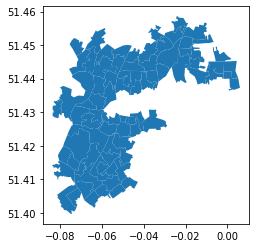

In [1332]:
df_zone2.loc[best_sample].plot()

In [1337]:
df_zone2.loc[best_sample,'pop_16_59'].sum()/df_zone2.loc[best_sample,'area_km'].sum()

4367.789321266333

In [1338]:
import random

In [1389]:
best_value=0
best_value_zone3=0

In [1552]:
def receive_concavehull(df,best_zones_ids_zone, alpha=5):
    geom = df.loc[best_zones_ids_zone].dissolve().geometry[0]
    
    if geom.geom_type=='Polygon':
        points = list(geom.exterior.coords)         
    else:
        points = list(geom[0].exterior.coords)
#     df.loc[best_zones_ids_zone].dissolve().plot()
#     plt.show()
    hull_zone = alphashape.alphashape(points, alpha)
#     print(hull_zone)
    return hull_zone

def receive_var_sum(df,hull_zone,var):
    return df.loc[df.within(hull_zone)][var].sum()


In [1551]:
df_neibors['geometry'].iloc[0].geom_type

'Polygon'

E01000742
4084.714014818017 90220 68
4084.714014818017
4084.714014818017 E01000742
E01001141


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3692.365631106006 91367 68
3692.365631106006
4084.714014818017 E01000742
E01003321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3758.7430658530034 90160 60
3758.7430658530034
4084.714014818017 E01000742
E01003224
4052.6424760012987 90072 72
4052.6424760012987
4084.714014818017 E01000742
E01003321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3758.7430658530034 90160 60
3758.7430658530034
4084.714014818017 E01000742
E01003261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3751.0602846663915 92139 71
3751.0602846663915
4084.714014818017 E01000742
E01032565
3606.784878658134 90468 74
3606.784878658134
4084.714014818017 E01000742
E01000717
3695.5798541002005 90200 64
3695.5798541002005
4084.714014818017 E01000742
E01003227
3831.6340239041083 91926 78
3831.6340239041083
4084.714014818017 E01000742
E01003256
3792.7533472118885 90350 81
3792.7533472118885
4084.714014818017 E01000742
E01000716
3695.5798541002005 90200 65
3695.5798541002005
4084.714014818017 E01000742
E01000806
3800.460015703016 92110 68
3800.460015703016
4084.714014818017 E01000742
E01003310


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3758.7430658530034 90160 61
3758.7430658530034
4084.714014818017 E01000742
E01003312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

3604.9152612118437 96151 80
3604.9152612118437
4084.714014818017 E01000742
E01000806
3800.460015703016 92110 68
3800.460015703016
4084.714014818017 E01000742


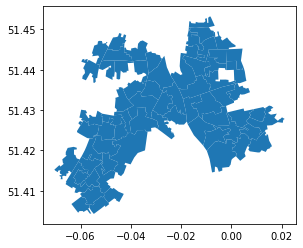

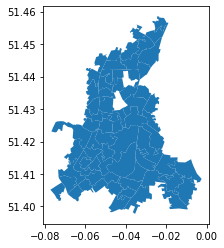

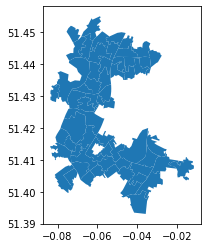

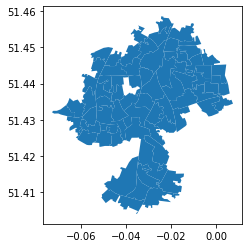

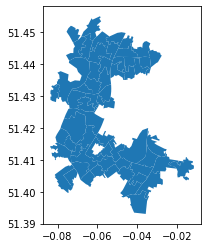

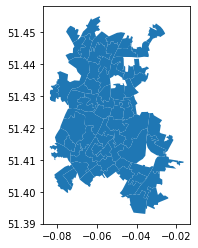

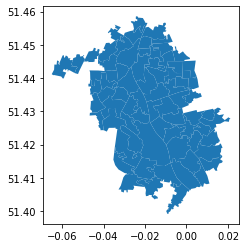

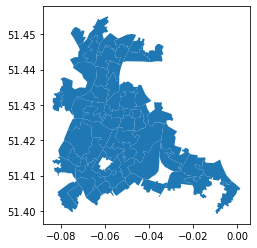

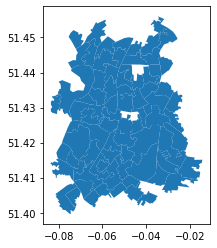

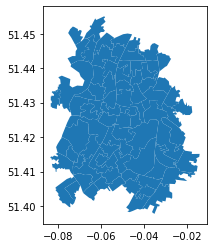

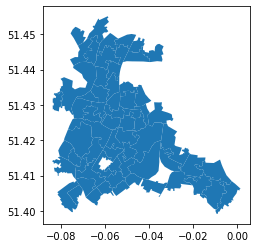

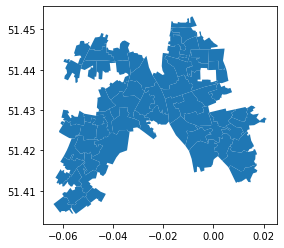

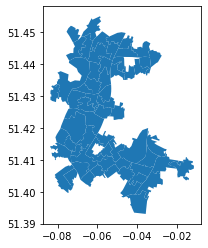

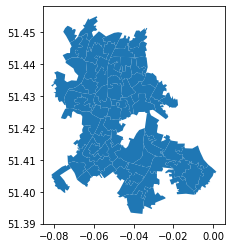

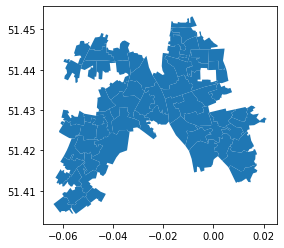

In [1567]:
best_value=0
for l in range(0,15):
    start_lsoa_zone2 = df_zone2.index[random.randint(0,len(df_zone2))]
    print(start_lsoa_zone2)
    pop_var=1
    best_zones_ids_zone2 = [start_lsoa_zone2]

    max_pop_dens=1

    while pop_var<pop_min:
        neigbors = [ i for i in list(w_zone2[best_zones_ids_zone2[-1]].keys()) if i not in best_zones_ids_zone2]
        df_neibors = df_zone2.loc[neigbors]
    #     print(df_neibors.shape)
        i=2
        while df_neibors.shape[0]==0:
            neigbors = [ i for i in list(w_zone2[best_zones_ids_zone2[-i]].keys()) if i not in best_zones_ids_zone2]
            df_neibors = df_zone2.loc[neigbors]
            i+=1
            if i>len(best_zones_ids_zone2):
                break
    #         print(df_neibors.shape)
        if (i>len(best_zones_ids_zone2) and i!=2):
                break

        df_neibors['hull_geometry'] = df_neibors.reset_index()['lsoa11cd'].apply(lambda x: receive_concavehull(df_zone2, best_zones_ids_zone2+[x], alpha=5)).values
        
#         print(df_neibors.head())

        df_neibors['area_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone2,x,'area_km'))                                                   
        df_neibors['pop_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone2,x,'pop_16_59'))       


        df_neibors['pop_dens_var'] = df_neibors['pop_sum']/ df_neibors['area_sum']
        best_lsoa_iter = df_neibors.loc[df_neibors['pop_dens_var']  == df_neibors['pop_dens_var'] .max()].index[0]                                                    
        best_zones_ids_zone2.append(best_lsoa_iter)
        pop_var =df_neibors.loc[best_lsoa_iter,'pop_sum']
#         print( df_neibors.loc[best_lsoa_iter,'pop_dens_var'],df_neibors.loc[best_lsoa_iter,'pop_sum'],len(best_zones_ids_zone2))
        if df_neibors.loc[best_lsoa_iter,'pop_dens_var']>max_pop_dens and df_neibors.loc[best_lsoa_iter,'pop_sum']>pop_min:
            max_pop_dens=df_neibors.loc[best_lsoa_iter,'pop_dens_var']
            print( max_pop_dens,df_neibors.loc[best_lsoa_iter,'pop_sum'], len(best_zones_ids_zone2))
            best_hull = df_neibors.loc[best_lsoa_iter,'hull_geometry']
        
    print(max_pop_dens)
    if max_pop_dens> best_value:
        best_value=max_pop_dens
        best_lsoa=start_lsoa_zone2
    print(best_value,best_lsoa)

In [1568]:
best_lsoa

'E01000742'

E01000742
5369.454287702836 2871 2
6094.222754863018 5024 3
6094.222754863018 5024 4
5573.091944271037 6197 5
5363.054032550402 7215 6
5456.4451490162955 8267 7
5477.19840580454 9199 8
5430.936859948222 10060 9
5297.48765942147 11243 10
5331.40705343669 12356 11
5299.199024520048 13513 12
5269.664202688991 14694 13
5301.842818898602 15908 14
5300.928671993954 17259 15
5159.8676663287915 19204 16
5239.470786071408 21197 17
5239.470786071408 21197 18
5239.470786071408 21197 19
4527.488408405766 22066 20
4451.761401929225 23516 21
4438.3342512940235 24532 22
4434.2531296343395 25548 23
4467.707566130547 26966 24
4374.072424773277 29002 25
4374.072424773277 29002 26
4251.654031310504 30018 27
4271.188766344362 31212 28
4270.84317006288 32205 29
4285.895564647347 35459 30
4390.336976027504 39599 31
4449.71783547105 41815 32
4557.527020129087 46128 33
4558.567164683884 47048 34
4569.679867959923 49180 35
4569.679867959923 49180 36
4582.751556106346 50536 37
4619.715848184922 51886 38
4551.79

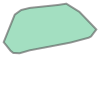

In [1569]:
start_lsoa_zone2 = best_lsoa
print(start_lsoa_zone2)
pop_var=1
best_zones_ids_zone2 = [start_lsoa_zone2]

max_pop_dens=1

while pop_var<pop_min:
    neigbors = [ i for i in list(w_zone2[best_zones_ids_zone2[-1]].keys()) if i not in best_zones_ids_zone2]
    df_neibors = df_zone2.loc[neigbors]
#     print(df_neibors.shape)
    i=2
    while df_neibors.shape[0]==0:
        neigbors = [ i for i in list(w_zone2[best_zones_ids_zone2[-i]].keys()) if i not in best_zones_ids_zone2]
        df_neibors = df_zone2.loc[neigbors]
        i+=1
        if i>len(best_zones_ids_zone2):
            break
#         print(df_neibors.shape)
    if (i>len(best_zones_ids_zone2) and i!=2):
            break

    df_neibors['hull_geometry'] = df_neibors.reset_index()['lsoa11cd'].apply(lambda x: receive_concavehull(df_zone2, best_zones_ids_zone2+[x], alpha=5)).values

#         print(df_neibors.head())

    df_neibors['area_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone2,x,'area_km'))                                                   
    df_neibors['pop_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone2,x,'pop_16_59'))       


    df_neibors['pop_dens_var'] = df_neibors['pop_sum']/ df_neibors['area_sum']
    best_lsoa_iter = df_neibors.loc[df_neibors['pop_dens_var']  == df_neibors['pop_dens_var'] .max()].index[0]                                                    
    best_zones_ids_zone2.append(best_lsoa_iter)
    pop_var =df_neibors.loc[best_lsoa_iter,'pop_sum']
    print( df_neibors.loc[best_lsoa_iter,'pop_dens_var'],df_neibors.loc[best_lsoa_iter,'pop_sum'],len(best_zones_ids_zone2))
    if df_neibors.loc[best_lsoa_iter,'pop_dens_var']>max_pop_dens and df_neibors.loc[best_lsoa_iter,'pop_sum']>pop_min:
        max_pop_dens=df_neibors.loc[best_lsoa_iter,'pop_dens_var']
        print( max_pop_dens,df_neibors.loc[best_lsoa_iter,'pop_sum'], len(best_zones_ids_zone2))
        best_hull = df_neibors.loc[best_lsoa_iter,'hull_geometry']

print(max_pop_dens)
best_hull

<AxesSubplot:>

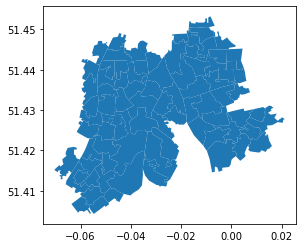

In [1574]:
df_zone2.loc[df_zone2.geometry.within(best_hull)].plot()

In [1575]:
df_zone2.loc[df_zone2.geometry.within(best_hull)].to_file('best_zone2.geojson', driver='GeoJSON')

In [1576]:
df_zone2.loc[df_zone2.geometry.within(best_hull)]['pop_16_59'].sum()

90220

E01004526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


5666.895926141477 90751 63
5666.895926141477
E01004596


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6235.589440522674 90064 55
6235.589440522674
E01004495


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

5351.372810496617 91376 61
5351.372810496617
E01003372
4945.645817956835 90566 65
4945.645817956835
E01004544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

5994.139892787212 92195 73
5994.139892787212
E01004510
5824.657731607045 90506 62
5824.657731607045
E01004475
5996.573306191435 90644 55
5996.573306191435
E01004621
5496.512613824574 93942 47
5496.512613824574
E01003403


5894.2110470049465 91507 41
5894.2110470049465
E01004515
5794.5994680160375 91578 60
5794.5994680160375
E01003459


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

5757.264784834642 91494 66
5757.264784834642
E01004515
5794.5994680160375 91578 60
5794.5994680160375
E01003472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

5523.027413533269 90335 53
5523.027413533269
E01004489
6164.239982829883 91621 61
6164.239982829883
E01004613
5761.06460214729 90005 46
5761.06460214729


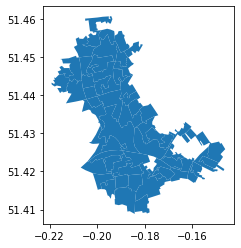

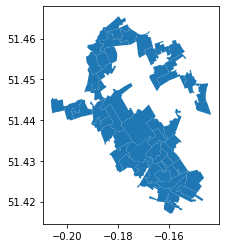

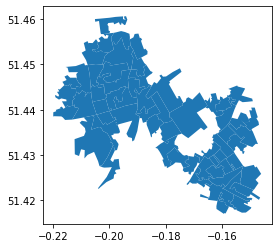

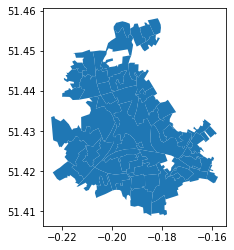

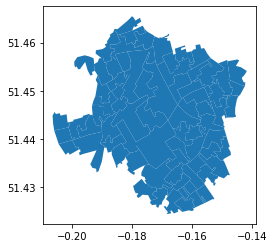

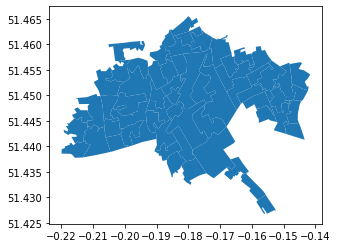

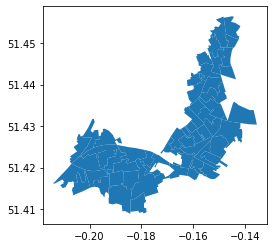

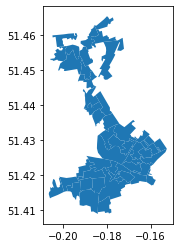

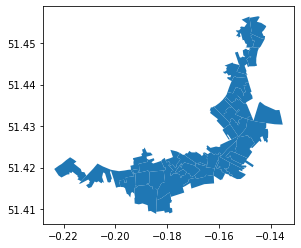

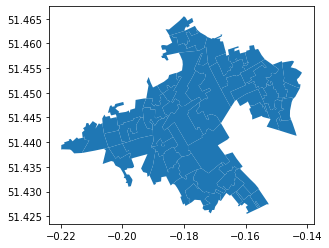

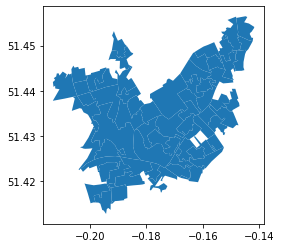

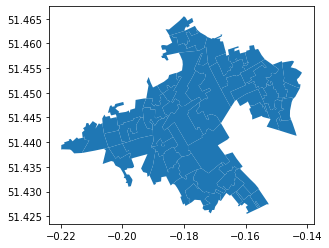

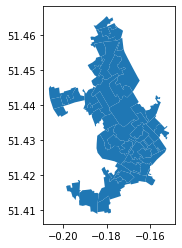

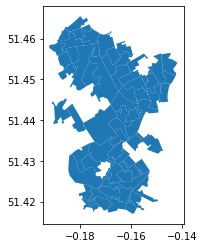

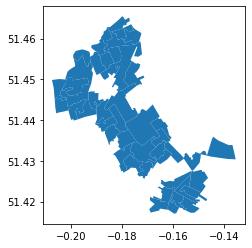

In [1578]:
best_value_zone3=0

for l in range(0,15):
    start_lsoa_zone3 = df_zone3.index[random.randint(0,len(df_zone3)-1)]
    print(start_lsoa_zone3)
    pop_var=1
    best_zones_ids_zone3 = [start_lsoa_zone3]
    
    max_pop_dens=1

    while pop_var<pop_min:
        neigbors = [ i for i in list(w_zone3[best_zones_ids_zone3[-1]].keys()) if i not in best_zones_ids_zone3]
        df_neibors = df_zone3.loc[neigbors]
    #     print(df_neibors.shape)
        i=2
        while df_neibors.shape[0]==0:
            neigbors = [ i for i in list(w_zone3[best_zones_ids_zone3[-i]].keys()) if i not in best_zones_ids_zone3]
            df_neibors = df_zone3.loc[neigbors]
            i+=1
            if i>len(best_zones_ids_zone3):
                break
    #         print(df_neibors.shape)
        if (i>len(best_zones_ids_zone3) and i!=2):
                break

        df_neibors['hull_geometry'] = df_neibors.reset_index()['lsoa11cd'].apply(lambda x: receive_concavehull(df_zone3, best_zones_ids_zone3+[x], alpha=5)).values
        
#         print(df_neibors.head())

        df_neibors['area_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone3,x,'area_km'))                                                   
        df_neibors['pop_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone3,x,'pop_16_59'))       


        df_neibors['pop_dens_var'] = df_neibors['pop_sum']/ df_neibors['area_sum']
        best_lsoa_iter = df_neibors.loc[df_neibors['pop_dens_var']  == df_neibors['pop_dens_var'] .max()].index[0]                                                    
        best_zones_ids_zone3.append(best_lsoa_iter)
        pop_var =df_neibors.loc[best_lsoa_iter,'pop_sum']
#         print( df_neibors.loc[best_lsoa_iter,'pop_dens_var'],df_neibors.loc[best_lsoa_iter,'pop_sum'],len(best_zones_ids_zone3))
        if df_neibors.loc[best_lsoa_iter,'pop_dens_var']>max_pop_dens and df_neibors.loc[best_lsoa_iter,'pop_sum']>pop_min:
            max_pop_dens=df_neibors.loc[best_lsoa_iter,'pop_dens_var']
            print( max_pop_dens,df_neibors.loc[best_lsoa_iter,'pop_sum'], len(best_zones_ids_zone3))
            best_sample = best_zones_ids_zone3.copy()
    df_zone3.loc[best_sample].plot()
        
    print(max_pop_dens)
    if max_pop_dens> best_value_zone3:
        best_value_zone3=max_pop_dens
        best_lsoa_zone3=start_lsoa_zone3

In [1434]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

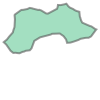

In [1583]:
receive_concavehull(df_zone2, best_zones_ids_zone2, alpha=130)

In [1508]:
145394/40.9

3554.865525672372

E01004596


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6657.230852754262 2124 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6970.68655810392 3464 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7228.460270978944 5179 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7365.259342294702 6323 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7191.934400981965 7303 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7834.744248922958 9628 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7462.864060719154 10809 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7599.50689687108 12368 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7978.871355812062 14030 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7988.832820870539 15033 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8098.231449251812 16082 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8115.84789002626 17529 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8210.036798901723 18800 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8368.566495834062 21454 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8521.704328021939 22651 16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


8544.483003107933 23756 17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


8432.98555539815 25756 18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

8336.179930142302 26644 19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7612.6697605747395 31323 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7612.6697605747395 31323 21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7612.6697605747395 31323 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7612.6697605747395 31323 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7612.6697605747395 31323 24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7420.205249785781 34334 25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7467.993069800328 36618 26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7531.645914673113 41611 27


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

7531.645914673113 41611 28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7531.645914673113 41611 29


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7531.645914673113 41611 30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


7531.645914673113 41611 31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6874.7796919904 42902 32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6874.7796919904 42902 33


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6368.063467388634 46715 34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6400.602588071856 48065 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6446.356802553984 49370 36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6485.389238365234 51733 37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6509.30779524517 52811 38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6517.716565357696 53810 39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6540.021640128893 55227 40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6486.062693580912 57747 41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6525.803889825171 59448 42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6040.225573828276 65525 43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6040.225573828276 65525 44


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6103.803550903326 67257 45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6124.15641015951 70819 46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6124.15641015951 70819 47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6116.7084865370325 72847 48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6088.005887694142 79036 49


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


6106.399217933979 80001 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6106.399217933979 80001 51


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6106.399217933979 80001 52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6125.80307982689 84913 53


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6214.986509675088 88960 54


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2

6235.589440522674 90064 55
6235.589440522674 90064 55
6235.589440522674


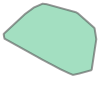

In [1587]:
# start_lsoa_zone3 = 'E01000741'
# print(start_lsoa_zone3)
start_lsoa_zone3 = best_lsoa_zone3
print(start_lsoa_zone3)
pop_var=1
best_zones_ids_zone3 = [start_lsoa_zone3]

max_pop_dens=1

while pop_var<pop_min:
    neigbors = [ i for i in list(w_zone3[best_zones_ids_zone3[-1]].keys()) if i not in best_zones_ids_zone3]
    df_neibors = df_zone3.loc[neigbors]
#     print(df_neibors.shape)
    i=2
    while df_neibors.shape[0]==0:
        neigbors = [ i for i in list(w_zone3[best_zones_ids_zone3[-i]].keys()) if i not in best_zones_ids_zone3]
        df_neibors = df_zone3.loc[neigbors]
        i+=1
        if i>len(best_zones_ids_zone3):
            break
#         print(df_neibors.shape)
    if (i>len(best_zones_ids_zone3) and i!=2):
            break

    df_neibors['hull_geometry'] = df_neibors.reset_index()['lsoa11cd'].apply(lambda x: receive_concavehull(df_zone3, best_zones_ids_zone3+[x], alpha=5)).values

#         print(df_neibors.head())

    df_neibors['area_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone3,x,'area_km'))                                                   
    df_neibors['pop_sum'] = df_neibors['hull_geometry'].apply(lambda x:receive_var_sum(df_zone3,x,'pop_16_59'))       


    df_neibors['pop_dens_var'] = df_neibors['pop_sum']/ df_neibors['area_sum']
    best_lsoa_iter = df_neibors.loc[df_neibors['pop_dens_var']  == df_neibors['pop_dens_var'] .max()].index[0]                                                    
    best_zones_ids_zone3.append(best_lsoa_iter)
    pop_var =df_neibors.loc[best_lsoa_iter,'pop_sum']
    print( df_neibors.loc[best_lsoa_iter,'pop_dens_var'],df_neibors.loc[best_lsoa_iter,'pop_sum'],len(best_zones_ids_zone3))
    if df_neibors.loc[best_lsoa_iter,'pop_dens_var']>max_pop_dens and df_neibors.loc[best_lsoa_iter,'pop_sum']>pop_min:
        max_pop_dens=df_neibors.loc[best_lsoa_iter,'pop_dens_var']
        print( max_pop_dens,df_neibors.loc[best_lsoa_iter,'pop_sum'], len(best_zones_ids_zone3))
        best_hull_zone3 = df_neibors.loc[best_lsoa_iter,'hull_geometry']

print(max_pop_dens)
best_hull_zone3

In [1608]:
hull_zone3 = receive_concavehull(df_zone3, best_zones_ids_zone3, alpha=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  import sys


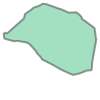

In [1610]:
hull_zone3 

In [1609]:
df_zone3.loc[df_zone3.within(hull_zone3)][['area_km','pop_16_59']].sum()

area_km         14.443542
pop_16_59    90064.000000
dtype: float64

In [1611]:
df_zone3.loc[df_zone3.within(hull_zone3)].to_file('best_zone3.geojson', driver='GeoJSON')

In [1601]:
90064/14.443542

6235.589580450557

In [1474]:
df_zone3.loc[df_zone3.within(hull)][['area_km','pop_16_59']].sum()

area_km          21.781092
pop_16_59    125245.000000
dtype: float64

In [1475]:
 125245/21.78

5750.459136822773

In [1612]:
london_zones = gpd.read_file('2zones_manual.geojson')

In [1618]:
gdf_lnd_zones_lsoa.head(3)

,lsoa11cd,geometry,pop_16_59,layer,distance,penetration,orders_predicted
0,E01000870,"POLYGON ((-0.13252 51.54724, -0.13301 51.54691...",1241,"Castle Road, London NW1 8SS, UK",427.410056,0.059626,73.995655
1,E01003353,"POLYGON ((-0.00214 51.42919, -0.00173 51.42882...",1118,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",1893.719970,0.016730,18.704212
2,E01003401,"POLYGON ((-0.20504 51.42635, -0.20436 51.42580...",873,"Unit 18,16 (jointed) Swan Industrial Estate, ...",1369.906194,0.017875,15.604889


In [1620]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['orders_predicted'].sum()

2688.2815931523255

In [1623]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.within(london_zones.geometry[1])]['orders_predicted'].sum()

2705.2644923002217

<AxesSubplot:>

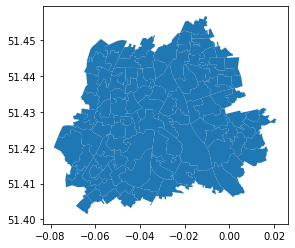

In [1627]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])].plot()

In [1632]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.within(best_hull)]['pop_16_59'].sum()

90220

<AxesSubplot:>

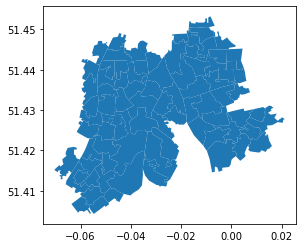

In [1633]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.within(best_hull)].plot()

In [1629]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()

116851

In [1639]:
df_zone2.loc[df_zone2.intersects(london_zones.geometry[0])]['area_km'].sum()

32.291326029327294

In [1640]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()/df_zone2.loc[df_zone2.intersects(london_zones.geometry[0])]['area_km'].sum()

3618.6497852046955

In [1630]:
gdf_lnd_zones_lsoa.loc[gdf_lnd_zones_lsoa.within(london_zones.geometry[0])]['pop_16_59'].sum()

59581

In [1641]:
gdf_eng_data_indexes

,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),...,Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),geometry,pop_density,lsoa_area,area_name
0,80,E01000083,Barking and Dagenham 007F,Barking and Dagenham 007F,1.792680e+05,1819.233559,E01000083,Barking and Dagenham 007F,E09000002,Barking and Dagenham,...,2,1888,526,1114,248,1091,"POLYGON ((0.13250 51.55556, 0.13197 51.55407, ...",0.006214,0.179372,London
1,109,E01000112,Barking and Dagenham 002E,Barking and Dagenham 002E,2.762796e+05,3758.702728,E01000112,Barking and Dagenham 002E,E09000002,Barking and Dagenham,...,2,2058,476,1325,257,1322,"POLYGON ((0.14189 51.56962, 0.14076 51.56952, ...",0.004796,0.276440,London
2,197,E01000201,Barnet 028C,Barnet 028C,3.931317e+05,3703.148989,E01000201,Barnet 028C,E09000003,Barnet,...,1,1582,349,789,444,793,"POLYGON ((-0.20576 51.59437, -0.19994 51.59301...",0.002007,0.393321,London
3,341,E01000345,Bexley 022D,Bexley 022D,2.099793e+05,3153.036560,E01000345,Bexley 022D,E09000004,Bexley,...,4,1351,246,810,295,805,"POLYGON ((0.09515 51.44471, 0.09633 51.44405, ...",0.003858,0.210099,London
4,346,E01000350,Bexley 021C,Bexley 021C,2.641372e+05,4392.614499,E01000350,Bexley 021C,E09000004,Bexley,...,3,1514,297,895,322,894,"POLYGON ((0.10439 51.44840, 0.10445 51.44740, ...",0.003388,0.264285,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,32367,E01033233,Exeter 001F,Exeter 001F,3.606224e+06,9517.522196,E01033233,Exeter 001F,E07000041,Exeter,...,10,6767,255,5660,852,5786,"POLYGON ((-3.53002 50.75034, -3.52976 50.74951...",0.001570,3.605228,Exeter
32840,32430,E01033306,Vale of White Horse 006H,Vale of White Horse 006H,3.377936e+05,3931.361116,E01033306,Vale of White Horse 006H,E07000180,Vale of White Horse,...,4,1769,274,1054,441,1078,"POLYGON ((-1.27650 51.67650, -1.27819 51.67484...",0.003120,0.337887,Vale of White Horse
32841,32466,E01033361,Bristol 039F,Bristol 039F,2.580377e+05,3573.378174,E01033361,Bristol 039F,E06000023,"Bristol, City of",...,2,1335,80,927,328,976,"POLYGON ((-2.59350 51.44582, -2.59174 51.44560...",0.003592,0.258015,"Bristol, City of"
32842,32471,E01033369,Bristol 056D,Bristol 056D,2.984071e+05,4538.837435,E01033369,Bristol 056D,E06000023,"Bristol, City of",...,4,1516,457,834,225,819,"POLYGON ((-2.57056 51.46128, -2.57014 51.46024...",0.002795,0.298400,"Bristol, City of"


In [1646]:
gdf_lnd_zones_lsoa = gdf_lnd_zones_lsoa.merge(gdf_eng_data_indexes[['lsoa11cd','lsoa_area','st_areasha']], on='lsoa11cd')

In [1653]:
gdf_lnd_zones_lsoa_zone2 = gdf_lnd_zones_lsoa.set_index('lsoa11cd').join(df_zone2[['area_km','pop_density']], lsuffix='_', how='inner')

KeyError: "None of ['lsoa11cd'] are in the columns"

In [1658]:
gdf_lnd_zones_lsoa.groupby('layer')['pop_16_59'].sum()/gdf_lnd_zones_lsoa.groupby('layer')['lsoa_area'].sum()

layer
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON    4428.650524
dtype: float64

In [1657]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()/gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['lsoa_area'].sum()

4492.618535151971

In [1659]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()

116851

In [1660]:
gdf_lnd_zones_lsoa['pop_16_59'].sum()

148780

In [1668]:
london_zones.iloc[0]

lsoa11cd                                            best_zone3_manual
pop_16_59                                                      116851
layer               UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...
distance                                                         None
penetration                                                  0.022958
orders_predicted                                          2688.281593
area_km                                                          None
pop_density                                               4492.618535
geometry            POLYGON ((-0.056929203773733 51.44267780775166...
Name: 0, dtype: object

In [1665]:
london_zones.loc[0,'pop_16_59'] =gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()
london_zones.loc[0,'penetration'] =gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['penetration'].mean()
london_zones.loc[0,'orders_predicted'] =gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['orders_predicted'].sum()
london_zones.loc[0,'pop_density'] =gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['pop_16_59'].sum()/gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['lsoa_area'].sum()


In [1667]:
london_zones.loc[0,'layer'] = 'UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON'

In [1669]:
london_zones.loc[0,'area_km']=gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['lsoa_area'].sum()

In [1686]:
london_zones.loc[:0]

,lsoa11cd,pop_16_59,layer,distance,penetration,orders_predicted,area_km,pop_density,geometry
0,best_zone3_manual,116851,"UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE...",1956.135703,0.022958,2688.281593,26.009553,4492.618535,"POLYGON ((-0.05693 51.44268, -0.05436 51.44649..."


In [1692]:
london_zones3= london_zones.loc[:0]

In [1694]:
london_zones3.columns[1:-1]

Index(['pop_16_59', 'layer', 'distance', 'penetration', 'orders_predicted',
       'area_km', 'pop_density'],
      dtype='object')

In [1695]:
for col in london_zones3.columns[3:-1]:
    london_zones3[col] = london_zones3[col].astype(float)

In [1696]:
london_zones3.to_file('new_zone_unit3orchard.geojson', driver='GeoJSON')

In [1701]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(best_hull)]['lsoa_area'].sum()/gdf_lnd_zones_lsoa['lsoa_area'].sum()

0.8004243069040914

In [1710]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(best_hull)]['distance'].quantile(0.8)

2755.488517636304

In [1709]:
gdf_lnd_zones_lsoa['distance'].quantile(0.8)

3051.6271996598803

In [1681]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.within(best_hull)]['pop_16_59'].sum()/gdf_lnd_zones_lsoa['pop_16_59'].sum()

0.6063987095039656

In [1698]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.within(best_hull)]['pop_16_59'].sum()/gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.within(best_hull)]['lsoa_area'].sum()

5071.058876145472

In [1700]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(best_hull)]['orders_predicted'].sum()/gdf_lnd_zones_lsoa['orders_predicted'].sum()

0.9042394898081272

In [ ]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(best_hull)]['orders_predicted'].sum()/gdf_lnd_zones_lsoa['orders_predicted'].sum()

In [ ]:
gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.within(best_hull)]['orders_predicted'].sum()/gdf_lnd_zones_lsoa['orders_predicted'].sum()

In [1675]:
london_zones.loc[0,'distance'] = gdf_lnd_zones_lsoa[gdf_lnd_zones_lsoa.intersects(london_zones.geometry[0])]['distance'].median()

In [1622]:
gdf_lnd_zones_lsoa.groupby('layer')['orders_predicted'].sum()

layer
Castle Road, London NW1 8SS, UK                                          5954.802078
UNIT_3_ORCHARD_BUSINESS_CENTRE,_KANGLEY_BRIDGE_ROAD,_SYDENHAM,_LONDON    3042.791333
Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR                   3476.192746
Name: orders_predicted, dtype: float64

### Приблизительный зоны на оценку

In [13]:
gpd_perspect_zones = gpd.read_file('zones_zhenya_pop.geojson')

<AxesSubplot:>

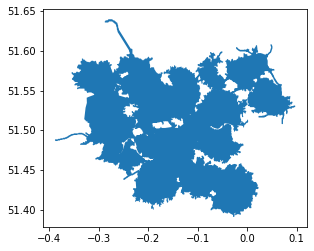

In [1773]:
gpd_perspect_zones.plot()

In [1789]:
gdf_eng_data_indexes_lnd

,Population aged 16-59: mid 2015 (excluding prisoners),geometry,lsoa11cd
0,1114,"POLYGON ((0.13250 51.55556, 0.13197 51.55407, ...",E01000083
1,1325,"POLYGON ((0.14189 51.56962, 0.14076 51.56952, ...",E01000112
2,789,"POLYGON ((-0.20576 51.59437, -0.19994 51.59301...",E01000201
3,810,"POLYGON ((0.09515 51.44471, 0.09633 51.44405, ...",E01000345
4,895,"POLYGON ((0.10439 51.44840, 0.10445 51.44740, ...",E01000350
...,...,...,...
32736,725,"POLYGON ((-0.10984 51.54812, -0.11121 51.54757...",E01033486
32771,1287,"POLYGON ((-0.00362 51.50634, -0.00436 51.50578...",E01032779
32773,1183,"POLYGON ((-0.14762 51.48365, -0.14766 51.48257...",E01033098
32778,851,"POLYGON ((-0.01217 51.47792, -0.01236 51.47720...",E01033746


In [1790]:
gdf_indexes_lnd_perspect_zones = gpd.sjoin(gdf_eng_data_indexes_lnd, gpd_perspect_zones,op='intersects', how='inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [1791]:
gdf_indexes_lnd_perspect_zones=gdf_indexes_lnd_perspect_zones.merge(gpd_perspect_zones[['layer','geometry']], on='layer')

In [1792]:
gdf_indexes_lnd_perspect_zones['geometry_zone_2395']=gdf_indexes_lnd_perspect_zones.set_geometry('geometry_y').to_crs('epsg:2395')['geometry_y']
gdf_indexes_lnd_perspect_zones['geometry_lsoa_2395']=gdf_indexes_lnd_perspect_zones.set_geometry('geometry_x').to_crs('epsg:2395')['geometry_x']

In [1793]:
gdf_indexes_lnd_perspect_zones['area_inter'] =gdf_indexes_lnd_perspect_zones[['geometry_zone_2395','geometry_lsoa_2395']].apply(lambda x: gf.area_2fields(x[['geometry_zone_2395','geometry_lsoa_2395']])/(10**6), axis=1)

In [1794]:
gdf_indexes_lnd_perspect_zones['lsoa_area']=gdf_indexes_lnd_perspect_zones['geometry_lsoa_2395'].apply(lambda x: x.area/(10**6))

In [1795]:
gdf_indexes_lnd_perspect_zones['area_inter_pct_lsoa'] =gdf_indexes_lnd_perspect_zones['area_inter']/ gdf_indexes_lnd_perspect_zones['lsoa_area']

(array([ 293.,  143.,  139.,  108.,  105.,   94.,   83.,  106.,  110.,
        2163.]),
 array([8.95378840e-06, 1.00008058e-01, 2.00007163e-01, 3.00006268e-01,
        4.00005372e-01, 5.00004477e-01, 6.00003582e-01, 7.00002686e-01,
        8.00001791e-01, 9.00000895e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

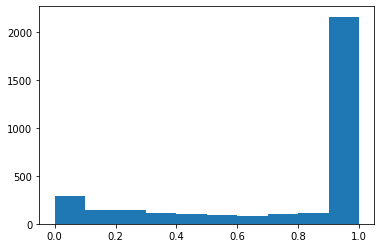

In [1796]:
plt.hist(gdf_indexes_lnd_perspect_zones['area_inter_pct_lsoa'])

In [1798]:
gdf_indexes_lnd_perspect_zones['pop_weighted_inter']  = gdf_indexes_lnd_perspect_zones['Population aged 16-59: mid 2015 (excluding prisoners)']*gdf_indexes_lnd_perspect_zones['area_inter_pct_lsoa']

In [1799]:
gdf_indexes_lnd_perspect_zones.groupby('layer')['pop_weighted_inter'].sum()

layer
11 Kendal Court, Park royal, W3 0RU                                164614.096643
25A Cudworth Street, E1 5QU                                        288856.856680
ARCH 3 ALMOND ROAD,  SE16 3LR                                      257402.833651
ARCH_77_QUEEN'S_CIRCUS,_QUEENSTOWN_ROAD,_BATTERSEA,_LONDON,_SW8    312504.947690
Barnes                                                              55837.086040
Bayswater_1                                                        177865.289903
Blackfairs bridge                                                   90004.432461
Castle Road, London NW1 8SS, UK                                    340974.461667
Chiswick                                                           137279.087060
Crickelwood                                                        197017.509166
East Ham                                                           181371.921643
Fullham                                                            108069.176255
Leyton_1              

In [1800]:
gpd_perspect_zones_up = gpd_perspect_zones.merge(gdf_indexes_lnd_perspect_zones.groupby('layer')['pop_weighted_inter'].sum().reset_index(), on='layer')
gpd_perspect_zones_up.to_file('gpd_perspect_zones_zhenya_pop.geojson', driver='GeoJSON')

In [1805]:
gpd_perspect_zones_up.layer.unique()

array(['11 Kendal Court, Park royal, W3 0RU',
       '25A Cudworth Street, E1 5QU', 'ARCH 3 ALMOND ROAD,  SE16 3LR',
       "ARCH_77_QUEEN'S_CIRCUS,_QUEENSTOWN_ROAD,_BATTERSEA,_LONDON,_SW8",
       'Barnes', 'Bayswater_1', 'Blackfairs bridge',
       'Castle Road, London NW1 8SS, UK', 'Chiswick', 'Crickelwood',
       'East Ham', 'Fullham', 'Leyton_1', 'North Wembley_1',
       'Stamford Hill_1',
       'Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR',
       'Unit 3 Orchard Business Centre, Sydenham SE26 5AQ',
       'West Dulwich'], dtype=object)

In [14]:
dict_stages={'11 Kendal Court, Park royal, W3 0RU':1,
       '25A Cudworth Street, E1 5QU':1, 'ARCH 3 ALMOND ROAD,  SE16 3LR':1,
       "ARCH_77_QUEEN'S_CIRCUS,_QUEENSTOWN_ROAD,_BATTERSEA,_LONDON,_SW8":1,
       'Barnes':3, 'Bayswater_1':3, 'Blackfairs bridge':3,
       'Castle Road, London NW1 8SS, UK':2, 'Chiswick':3, 'Crickelwood':3,
       'East Ham':3, 'Fullham':3, 'Leyton_1':3, 'North Wembley_1':3,
       'Stamford Hill_1':3,
       'Unit 18,16 (jointed) Swan Industrial Estate,  SW17 0AR':2,
       'Unit 3 Orchard Business Centre, Sydenham SE26 5AQ':2,
       'West Dulwich':3}

In [15]:
gpd_perspect_zones['stage_num'] = gpd_perspect_zones['layer'].map(dict_stages)

In [16]:
gpd_perspect_zones

,layer,Population aged 16-59: mid 2015 (excluding prisoners)_count,Population aged 16-59: mid 2015 (excluding prisoners)_unique,Population aged 16-59: mid 2015 (excluding prisoners)_min,Population aged 16-59: mid 2015 (excluding prisoners)_max,Population aged 16-59: mid 2015 (excluding prisoners)_range,Population aged 16-59: mid 2015 (excluding prisoners)_sum,Population aged 16-59: mid 2015 (excluding prisoners)_mean,Population aged 16-59: mid 2015 (excluding prisoners)_median,Population aged 16-59: mid 2015 (excluding prisoners)_stddev,Population aged 16-59: mid 2015 (excluding prisoners)_minority,Population aged 16-59: mid 2015 (excluding prisoners)_majority,Population aged 16-59: mid 2015 (excluding prisoners)_q1,Population aged 16-59: mid 2015 (excluding prisoners)_q3,Population aged 16-59: mid 2015 (excluding prisoners)_iqr,geometry,stage_num
0,"11 Kendal Court, Park royal, W3 0RU",103,99,613.0,2950.0,2337.0,121024.0,1174.990291,1111.0,299.856260,613.0,1029.0,1002.0,1284.0,282.0,"POLYGON ((-0.25943 51.54401, -0.24522 51.54134...",1
1,"25A Cudworth Street, E1 5QU",160,151,692.0,2984.0,2292.0,226095.0,1413.093750,1341.5,416.749232,692.0,913.0,1112.5,1579.5,467.0,"POLYGON ((-0.05725 51.55482, -0.05702 51.55482...",1
2,"ARCH 3 ALMOND ROAD, SE16 3LR",137,120,699.0,2973.0,2274.0,184914.0,1349.737226,1315.0,363.260182,699.0,1012.0,1108.0,1523.0,415.0,"POLYGON ((-0.03883 51.52091, -0.03861 51.52091...",1
3,"ARCH_77_QUEEN'S_CIRCUS,_QUEENSTOWN_ROAD,_BATTE...",202,182,542.0,2121.0,1579.0,246059.0,1218.113861,1162.0,293.818665,542.0,985.0,1020.0,1368.0,348.0,"POLYGON ((-0.15875 51.51350, -0.15763 51.51282...",1
4,Barnes,29,29,747.0,1554.0,807.0,30983.0,1068.379310,1104.0,200.743002,747.0,747.0,877.0,1181.0,304.0,"POLYGON ((-0.29122 51.46769, -0.29097 51.46803...",3
5,Bayswater_1,122,117,605.0,1918.0,1313.0,140137.0,1148.663934,1078.5,291.026578,605.0,928.0,935.0,1339.0,404.0,"POLYGON ((-0.23406 51.51558, -0.23003 51.51558...",3
6,Blackfairs bridge,41,40,580.0,2973.0,2393.0,53371.0,1301.731707,1180.0,486.137340,580.0,1153.0,1059.0,1468.0,409.0,"POLYGON ((-0.13810 51.50133, -0.13784 51.50167...",3
7,"Castle Road, London NW1 8SS, UK",220,201,647.0,2670.0,2023.0,276775.0,1258.068182,1196.5,288.807422,647.0,992.0,1070.0,1423.5,353.5,"POLYGON ((-0.14685 51.58222, -0.14595 51.58177...",2
8,Chiswick,79,75,613.0,2214.0,1601.0,87762.0,1110.911392,1057.0,252.908559,613.0,976.0,976.0,1183.0,207.0,"POLYGON ((-0.38787 51.48880, -0.38315 51.48880...",3
9,Crickelwood,118,107,722.0,1786.0,1064.0,141850.0,1202.118644,1175.5,230.772622,722.0,1095.0,1048.0,1337.0,289.0,"POLYGON ((-0.28719 51.63746, -0.28667 51.63815...",3


In [1808]:
gpd_perspect_zones_up['stage_num'] = gpd_perspect_zones_up['layer'].map(dict_stages)

In [1809]:
gpd_perspect_zones_up['stage_num'].value_counts()

3    11
1     4
2     3
Name: stage_num, dtype: int64

In [1810]:
pop1 = gpd_perspect_zones_up[gpd_perspect_zones_up['stage_num']<=1]['pop_weighted_inter'].sum()
pop2 = gpd_perspect_zones_up[gpd_perspect_zones_up['stage_num']<=2]['pop_weighted_inter'].sum()
pop3 = gpd_perspect_zones_up[gpd_perspect_zones_up['stage_num']<=3]['pop_weighted_inter'].sum()
print(pop1,pop2,pop3)

1023378.7346643596 1726332.9990544284 3184554.721283014


In [1814]:
 geo_zone2 = gpd_perspect_zones_up[gpd_perspect_zones_up['stage_num']<=2].geometry.unary_union

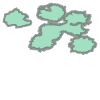

In [1833]:
 geo_zone2

In [1815]:
 geo_zone3 = gpd_perspect_zones_up[gpd_perspect_zones_up['stage_num']<=3].geometry.unary_union

In [1823]:
  geo_zone3_borders= geo_zone3.exterior

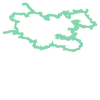

In [1829]:
  geo_zone3_borders

In [1832]:
gdf_eng_data_indexes_lnd.loc[gdf_eng_data_indexes_lnd.within(  geo_zone3)]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

2217634

In [1839]:
(22+30)/2

26.0

In [1834]:
gdf_eng_data_indexes_lnd.loc[gdf_eng_data_indexes_lnd.within(  geo_zone2)]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

1307660

In [1837]:
gdf_eng_data_indexes_lnd.loc[gdf_eng_data_indexes_lnd.intersects(  geo_zone2)]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum()

1917003

In [1840]:
(1307660+1917003)/2

1612331.5

In [5]:
  gdf_getir=gpd.read_file('getir_new_london.geojson')

In [9]:
gdf_eng_data_indexes.loc[gdf_eng_data_indexes.intersects(  gdf_getir.geometry.iloc[0])]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum() 


4169870

In [11]:
gdf_eng_data_indexes.loc[gdf_eng_data_indexes.within(  gdf_getir.geometry.iloc[0])]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum() 


3199843

In [12]:
(4169870+3199843)/2

3684856.5

In [1855]:
import pyproj

from shapely.geometry import Point
from shapely.ops import transform

point_76glentham = Point( -0.2369492634529675, 51.48703244912447)

trans_4326= pyproj.CRS('EPSG:4326')
trans_32629 = pyproj.CRS('EPSG:32629')

In [1856]:
project = pyproj.Transformer.from_crs(trans_4326,trans_32629, always_xy=True).transform
point_76glentham_metre = transform(project, point_76glentham)

In [1860]:
mile1_buf = point_76glentham_metre.buffer(1631)
mile3_buf = point_76glentham_metre.buffer(4830)

In [1864]:
(4830*4830)/(1631*1631)

8.769732358304628

In [1861]:
gdf_eng_data_indexes_lnd[gdf_eng_data_indexes_lnd.to_crs('epsg:32629').intersects(mile1_buf )].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Population aged 16-59: mid 2015 (excluding prisoners)                                                59271
lsoa11cd                                                 E01001933E01001862E01003800E01002571E01001900E...
dtype: object

In [1866]:
8.76*58000

508080.0

In [1867]:
649/58

11.189655172413794

In [1862]:
gdf_eng_data_indexes_lnd[gdf_eng_data_indexes_lnd.to_crs('epsg:32629').intersects(mile3_buf )].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Population aged 16-59: mid 2015 (excluding prisoners)                                               459730
lsoa11cd                                                 E01001884E01001933E01002819E01033101E01002852E...
dtype: object

In [1863]:
gdf_eng_data_indexes_lnd[gdf_eng_data_indexes_lnd.to_crs('epsg:32629').within(mile3_buf )].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Population aged 16-59: mid 2015 (excluding prisoners)                                               364776
lsoa11cd                                                 E01001884E01001933E01033101E01001357E01002877E...
dtype: object

In [29]:
gdf_all_lnd = gpd.read_file('all_london_area1.geojson')

In [30]:
gdf_all_lnd.crs='epsg:3857'

In [32]:
gdf_all_lnd1 = gdf_all_lnd.to_crs('epsg:4326')

In [40]:
gdf_all_lnd.crs='epsg:1936'

CRSError: Invalid projection: epsg:1936: (Internal Proj Error: proj_create: crs not found)

In [42]:
gdf_london = gpd.read_file('London_Borough_Excluding_MHW.shp').to_crs('epsg:4326')

In [44]:
gdf_london.dissolve().to_file('all_london.geojson', driver='GeoJSON')

In [45]:
gdf_london = gdf_london.dissolve()

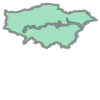

In [47]:
gdf_london.geometry.iloc[0]

In [48]:
gdf_eng_data_indexes.loc[gdf_eng_data_indexes.within( gdf_london.geometry.iloc[0])]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum() 


5195931

In [49]:
gdf_eng_data_indexes.loc[gdf_eng_data_indexes.intersects( gdf_london.geometry.iloc[0])]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum() 


5682218

In [50]:
(5682218+5195931)/2

5439074.5

In [55]:
gpd_perspect_zones.dissolve().to_crs('epsg:3857').geometry.iloc[0].area/gdf_london.to_crs('epsg:3857').geometry.iloc[0].area

0.2615588757590519

In [52]:
 gdf_getir.to_crs('epsg:3857').geometry.iloc[0].area/gdf_london.to_crs('epsg:3857').geometry.iloc[0].area

0.44120335705007596

In [ ]:
gdf_eng_data_indexes.loc[gdf_eng_data_indexes.intersects( gdf_london.geometry.iloc[0])]['Population aged 16-59: mid 2015 (excluding prisoners)'].sum() 
